# **Price Sale Study**

## Objectives

* Engineer features for Classification, Regression and Cluster models

## Inputs

* outputs/datasets/cleaned/TrainSet.csv
* outputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Conclusions

...


---

# Change working directory


* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heriting-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heriting-housing-issues'

---

# Load Data

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48          Unf   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0       1774            0.0         774          Unf  ...    11694   
1        894            0.0         308          Unf  ...     6600   
2        163            0.0         432          Unf  ...    13360   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         90.0      452.0          108            5            9         1822   
1         60.0        0.0            0            5            5          894   
2         80.0        0.0            0            7            5          876   

   YearBuilt  YearRemodAdd  SalePrice  
0       2007          2007     314813  
1       1962          1962     109500  
2       1921          2006     163500  

[3 rows x 23 columns]

In [5]:
test_set_path = 'outputs/datasets/cleaned/TestSetCleaned.csv'
TestSet = pd.read_csv(test_set_path)
TestSet.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0        816            0.0         484          Unf  ...    32668   
1        238            0.0         240          Unf  ...     9490   
2        524            0.0         352          Unf  ...     7015   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         69.0        0.0            0            3            6         2035   
1         79.0        0.0            0            7            6          806   
2         69.0      161.0            0            4            5          709   

   YearBuilt  YearRemodAdd  SalePrice  
0       1957          1975     200624  
1       1941          1950     133000  
2       1950          1950     110000  

[3 rows x 23 columns]

## Data Exploration

This step has been already completed in the PriceSaleStudy. See below details:

We can learn the below from the Profile Report above:
* 1stFlrSF: 0 missing data, range of data between 334-4692, data type integer and normally distributed.
* 2sdFlrSF: **86 missing data (5.9%)**, range of data between 0-2065, 781 0s (53.05%), **the 0s mean there is no second floor in those houses**, data type integer.
* BedroomAbvGr: **99 missing datas (6.8%)**, range of data between 0-8, data type integer.
* BsmtExposure: 0 missing data, categorical data with variables [none, mn, gd, av, no], **none and no likely to be the same.**
* BsmtFinSF1: 0 missing data, range of data between 0-5644, 467 0s (32%), **the 0s mean there is no basement for those houses**, data type integer.
* BsmtFinType1: **114 missing data (7.8%)** categorical data with variable [glq, blq, alq, unf, lwq, rec, none], **missing data likely to be none**.
* BsmtUnfSF: 0 missing data, range of data between 0-2336, 118 0s (8.1%), data type integer.
* EnclosedPorch: **1324 missing data (90.7%)**, range of data between 0-286, 116 0s (7.9%), data type integer.
* GarageArea: 0 missing data, range of data between 0-1418, 81 0s (5.5%), date type integer, **the 0s mean there is no garage for those houses**.
* GarageFinish: **162 missing data (11.1%)**, categorical data with variable [rfn, unf, fin, none], **none means there is no garage for those houses.**
* GarageYrBlt: **81 missing data (5.5%)**,  range of data between 1990-2010, data type integer, **the missing date is exactly the number of 0s in Garage Area meaning the missing data is the date with no Garage.**
* GrLivArea: 0 missing data, range of data between 334-5642, data type integer, **well distributed.**
* KitchenQual: 0 missing data, categorical data with variable [ta, gd, fa, ex].
* LotArea: 0 missing data, range of data between 1300-215245, data type integer.
* LotFrontage: **259 missing data (17.7%)**, range of data between 21-313, data type integer.
* MasVnrArea: **8 missing data (0.5%)**, range of data between 0-1600, 861 0s (59%).
* OpenPorchSF: 0 missing data, range of data between 0-547, 656 0s (44.9%), data type integer.
* OverallCond: 0 missing data, range of data between 1-9, data type integer.
* OverallQual: 0 missing data, range of data between 1-10, data type integer.
* TotalBsmtSF: 0 missing data, range of data between 0-6110, 37 0s (2.5%), data type integer, **the 0s mean there is no basement for those houses.**
* WoodDeckSF: **1305 missing data (89.4%)**, range of data between 0-736, 78 0s (5.3%), data type integer, **this row have been avoided during the data production and could corrupted the data because of the small amount of actual data we have, we would suggest to drop this feature for a better performance of the model.**
* YearBuilt: 0 missing data, range of data between 1872-2010, data type integer.
* YearRemodAdd: 0 missing data, range of data between 1950-2010, data type integer. 
* SalePrice: 0 missing data, range of data between 34900-755000, data type integer, **SalePrice is the target of this project.**

# Correlation and PPS Analysis

---

This step has been already completed in the DataCleaning.

We can conclude the below from the correlations and plots:

* When 1stFlrSF increase, the SalePrice tend to increase.
* When GarageArea increase, the SalePrice tend to increase. The house without a garage (GarageArea = 0) are worth <=200 000.
* When GrLivArea increase, the SalePrice tend to increase.
* The houses with the KitchenQual_Ex selection are mainly the houses with a Saleprice of <400 000.
* The houses with the KitchenQual_TA selection are mainly the houses with a Saleprice of <300 000.
* When Overallqual increase, the SalePrice tend to increase. Following the Spearman and Pearson, it most correlated feature to the target.
* When TotalBsmtSF increase, the SalePrice tend to increase.
* When YearBuilt increase, the SalePrice tend to increase. This trend goes more exponential from the year 1980.
* When YearRemodAdd increase, the SalePrice tend to increase. This trend goes more exponential from the year 1980.

---

## Feature Engineering

The below function is taken from Code Institute walkthrough project. It runs 3 types of analysis where here we are only interested by two of them, numerical and categorical. If numerica, the function will check the transformer ["log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"] and plot the result if it is acceptable to use it. If categorical, it will run a ordinal encoder and plot the result for each variables. In this situation, we prefer to use a ordinal encore instead of a one hot encoder because of the many selection in each categorical feature and since we have already many features. A ont hot encore will extend the number of features which will become hard to study.

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

In [7]:
variables_numerical= ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
                        'BsmtFinSF1', 'GarageArea', 'YearRemodAdd',
                        'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea', 
                        'GarageYrBlt', 'LotArea', 'YearBuilt',
                        'LotFrontage', 'MasVnrArea','TotalBsmtSF',
                        'OpenPorchSF', 'OverallCond', 'OverallQual',]

variables_numerical

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'GarageArea',
 'YearRemodAdd',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GrLivArea',
 'GarageYrBlt',
 'LotArea',
 'YearBuilt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual']

In [8]:
variables_categorical= ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

variables_categorical

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

### Categorical features

In [9]:
df_engineering = TrainSet[variables_categorical].copy()
df_engineering.head(3)

BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           Av          Unf          Unf          Gd
1           No          Unf          Unf          TA
2           No          ALQ          Unf          TA

* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



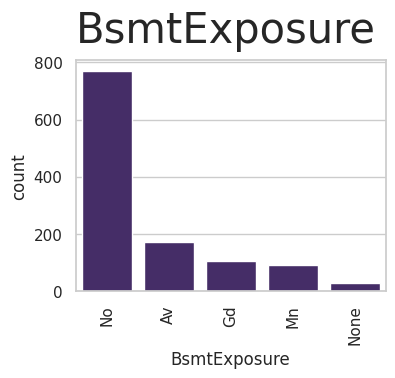

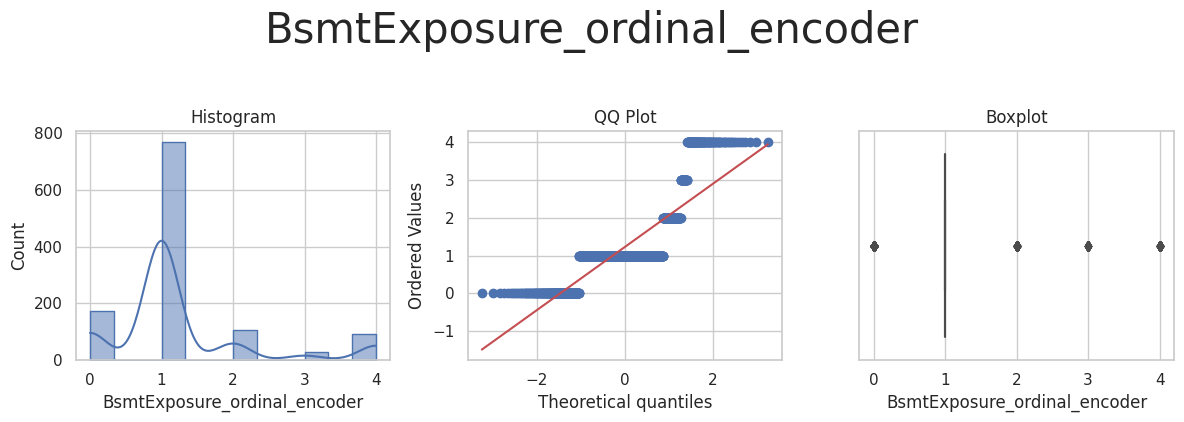



* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



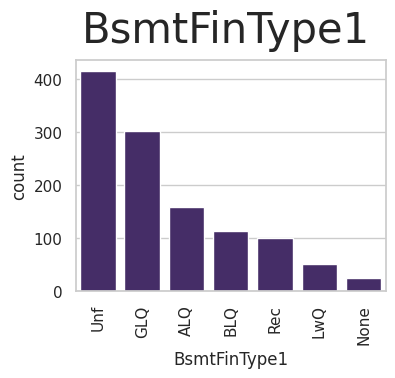

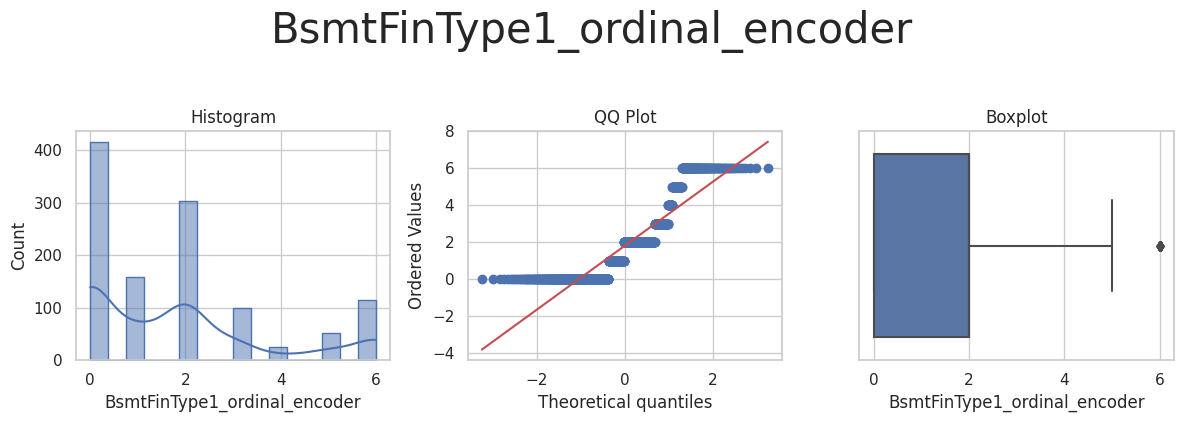



* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



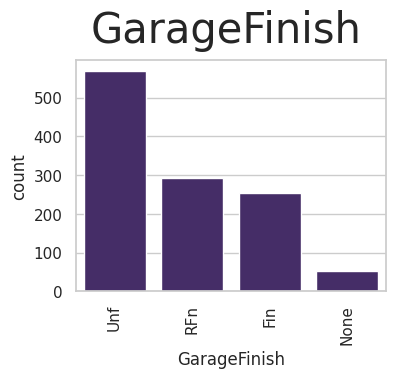

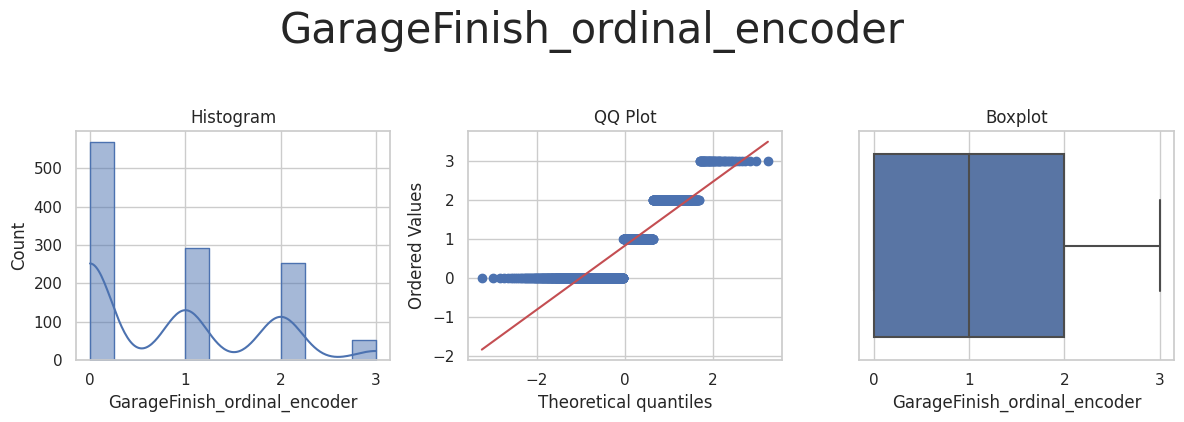



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



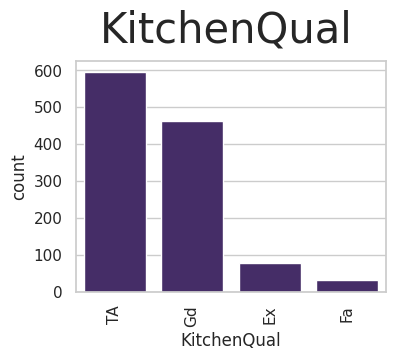

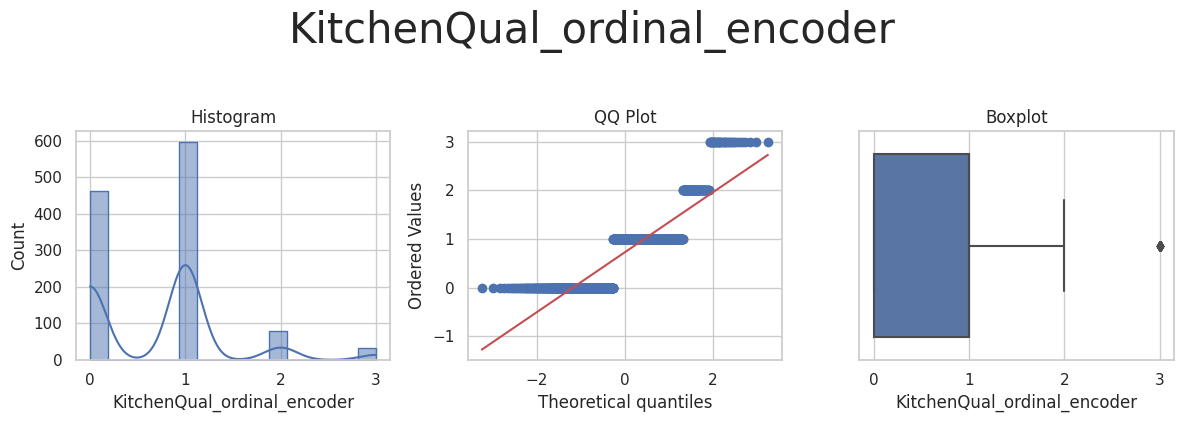

In [10]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

The categorical variables are now numbers. By looking at the Histogram and QQ plot, the ordinal encoder have spread correctly the selections into numbers. Now that we are happy, we can fit_transform the TrainSet and transform the TestSet

In [10]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_categorical)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

In [12]:
TrainSet.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      1828       0.0           3.0             0          48             0   
1       894       0.0           2.0             1           0             0   
2       964       0.0           2.0             1         713             1   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...  LotArea  \
0       1774            0.0         774             0  ...    11694   
1        894            0.0         308             0  ...     6600   
2        163            0.0         432             0  ...    13360   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0         90.0       452.0          108            5            9   
1         60.0         0.0            0            5            5   
2         80.0         0.0            0            7            5   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         1822       2007          2007     314813  
1          894       1962          1962     109500  
2          876       1921          2006     163500  

[3 rows x 23 columns]

### Numerical features

Now we are running the functions for the numerical number to see the best trasformer to use.

In [11]:
df_engineering = TrainSet[variables_numerical].copy()
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  GarageArea  YearRemodAdd  \
0      1828       0.0           3.0          48         774          2007   
1       894       0.0           2.0           0         308          1962   
2       964       0.0           2.0         713         432          2006   

   BsmtUnfSF  EnclosedPorch  GrLivArea  GarageYrBlt  LotArea  YearBuilt  \
0       1774            0.0       1828       2007.0    11694       2007   
1        894            0.0        894       1962.0     6600       1962   
2        163            0.0        964       1921.0    13360       1921   

   LotFrontage  MasVnrArea  TotalBsmtSF  OpenPorchSF  OverallCond  OverallQual  
0         90.0       452.0         1822          108            5            9  
1         60.0         0.0          894            0            5            5  
2         80.0         0.0          876            0            7            5

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



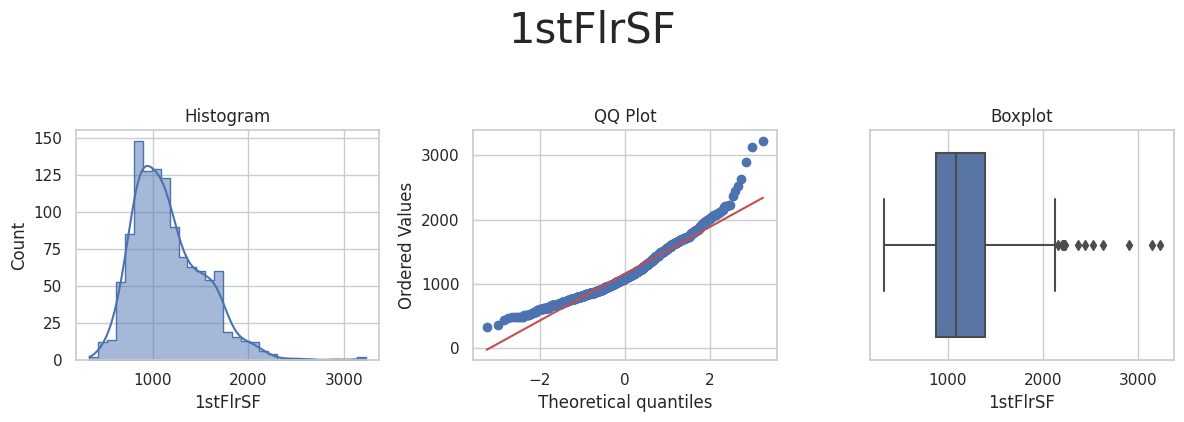

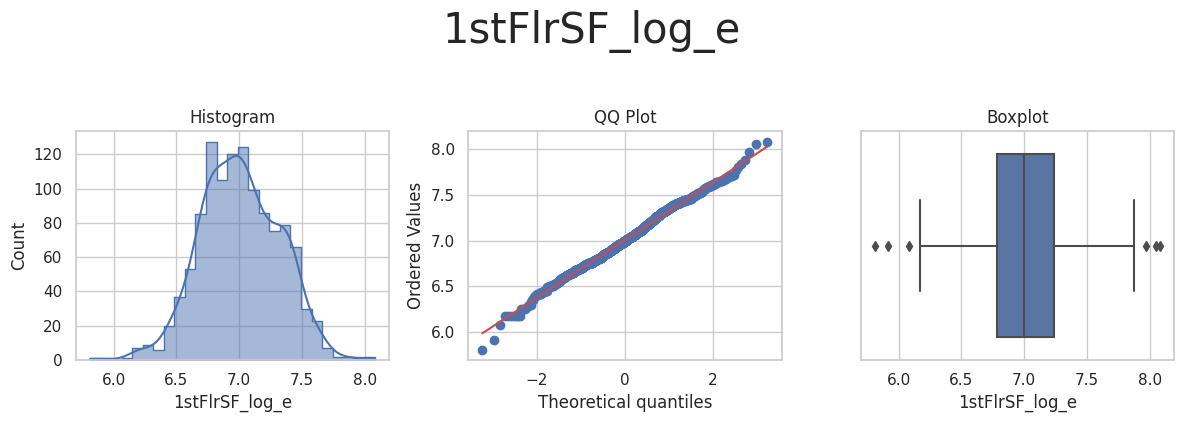

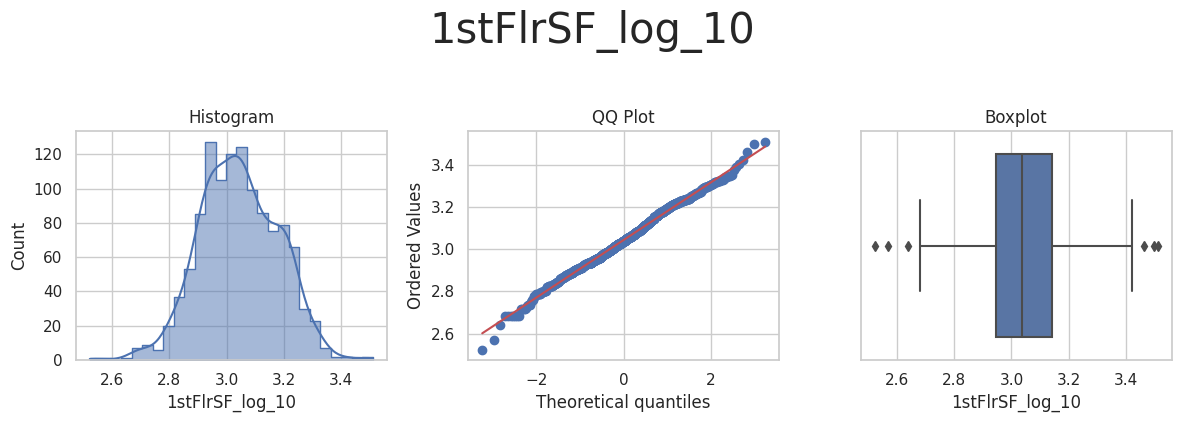

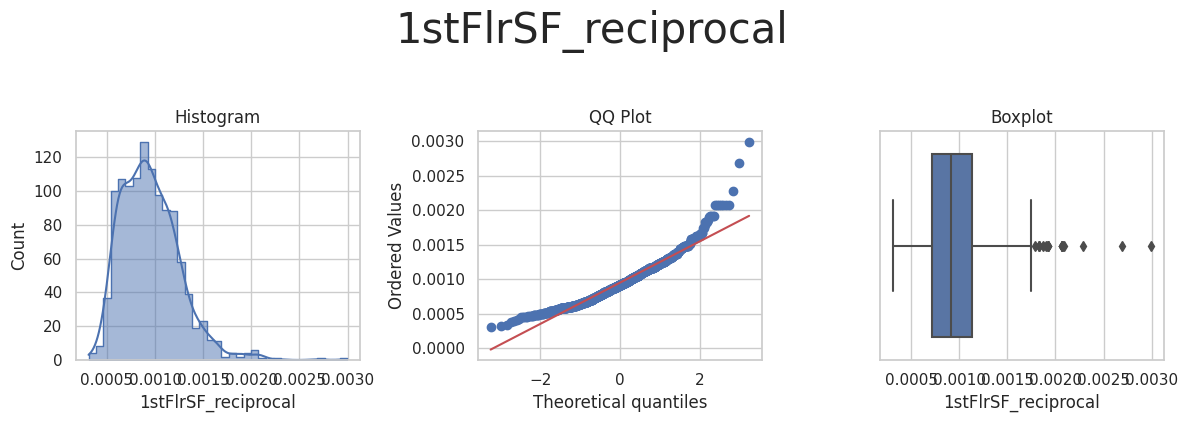

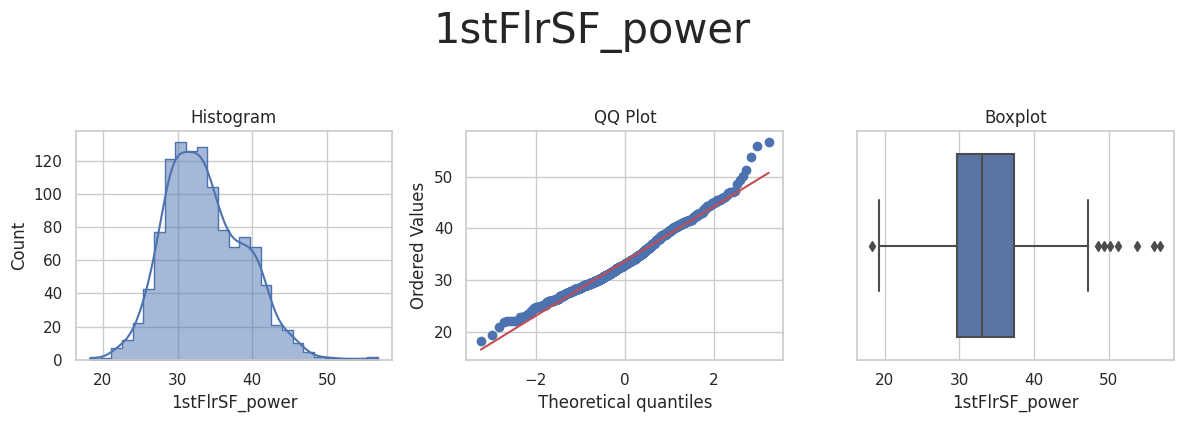

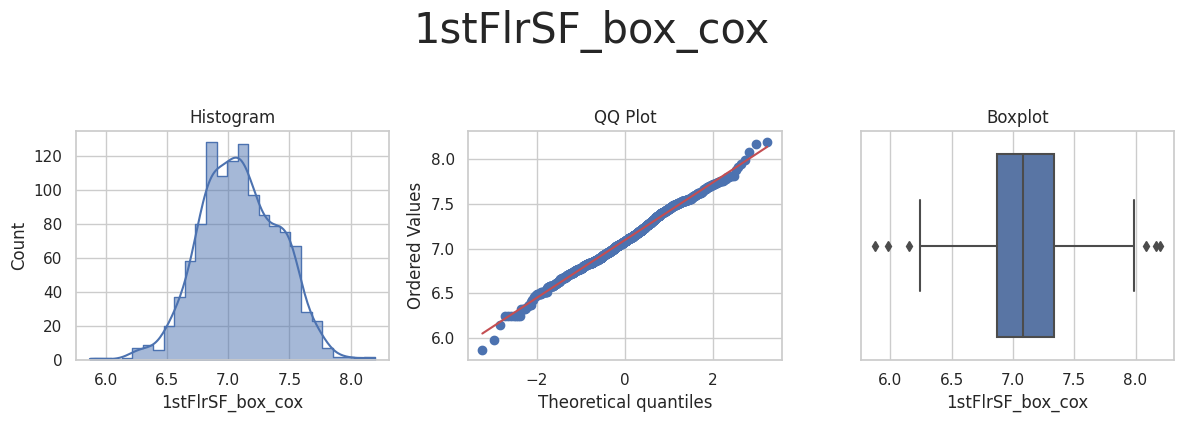

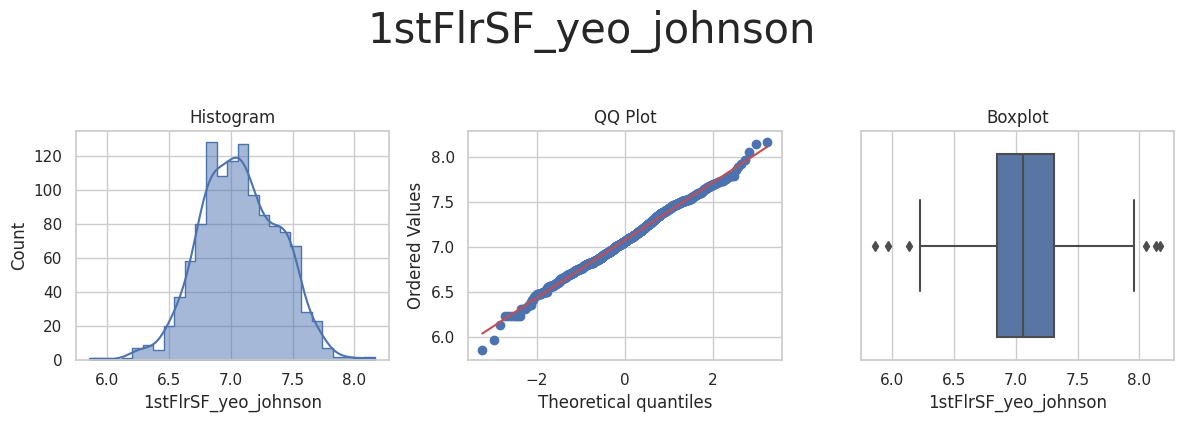



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



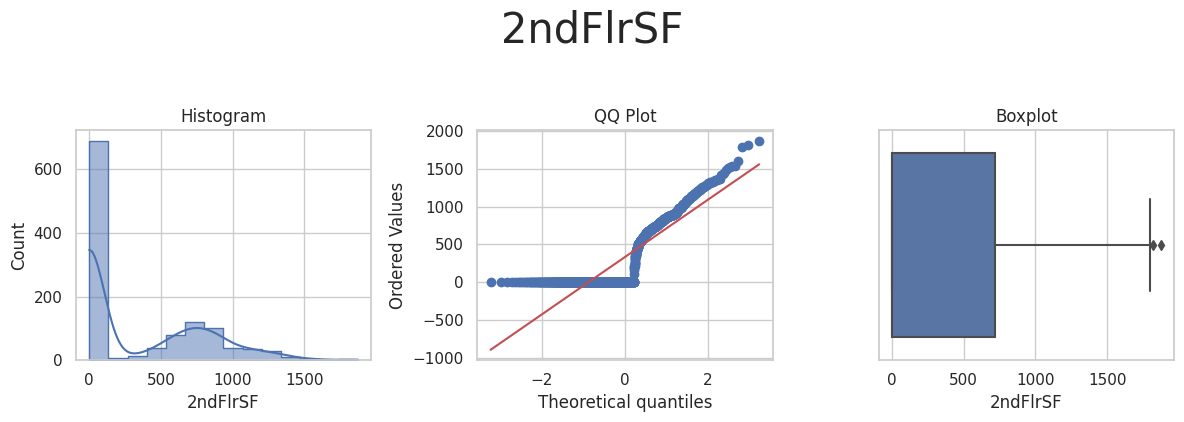

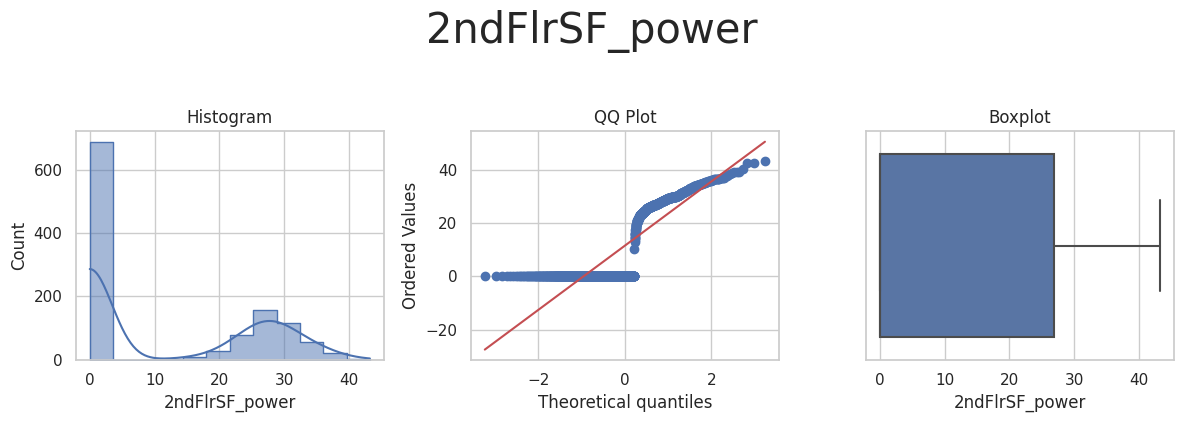

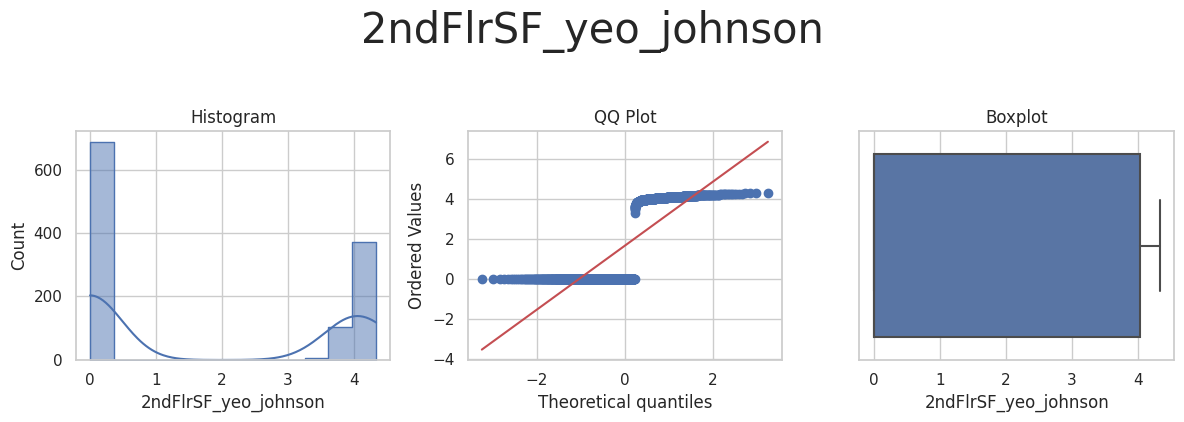



* Variable Analyzed: BedroomAbvGr
* Applied transformation: ['BedroomAbvGr_power', 'BedroomAbvGr_yeo_johnson'] 



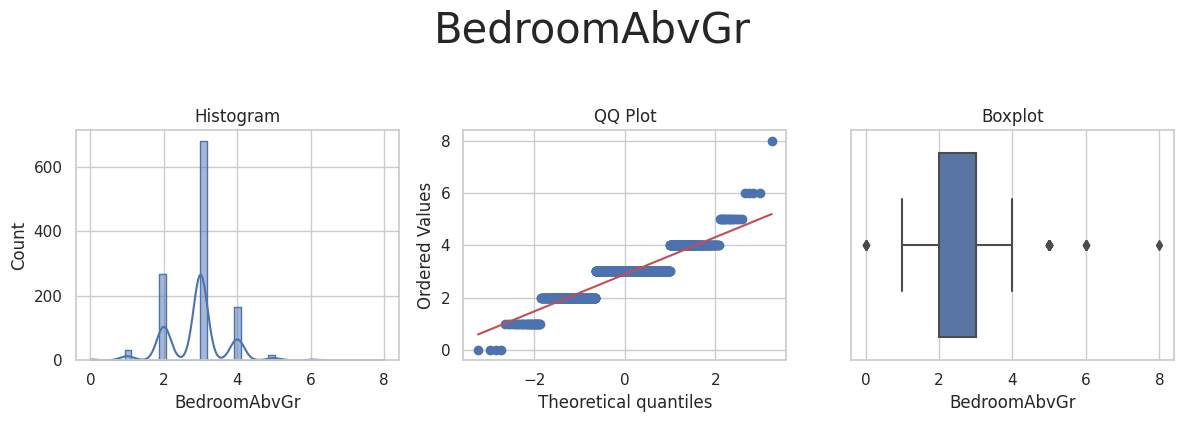

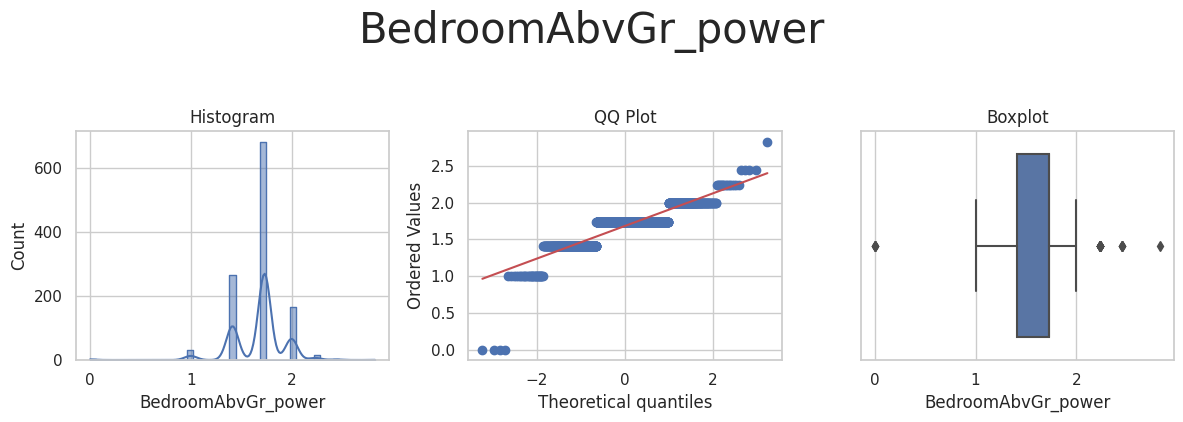

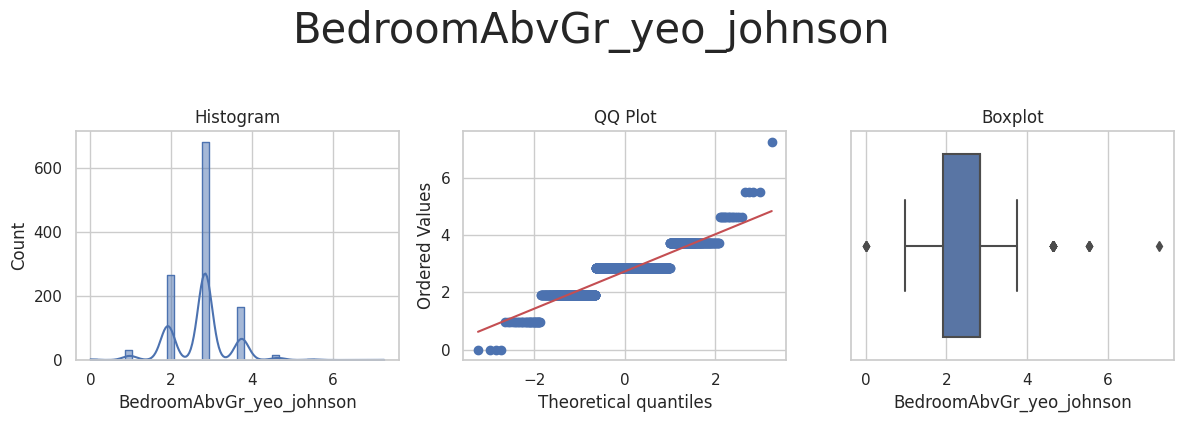



* Variable Analyzed: BsmtFinSF1
* Applied transformation: ['BsmtFinSF1_power', 'BsmtFinSF1_yeo_johnson'] 



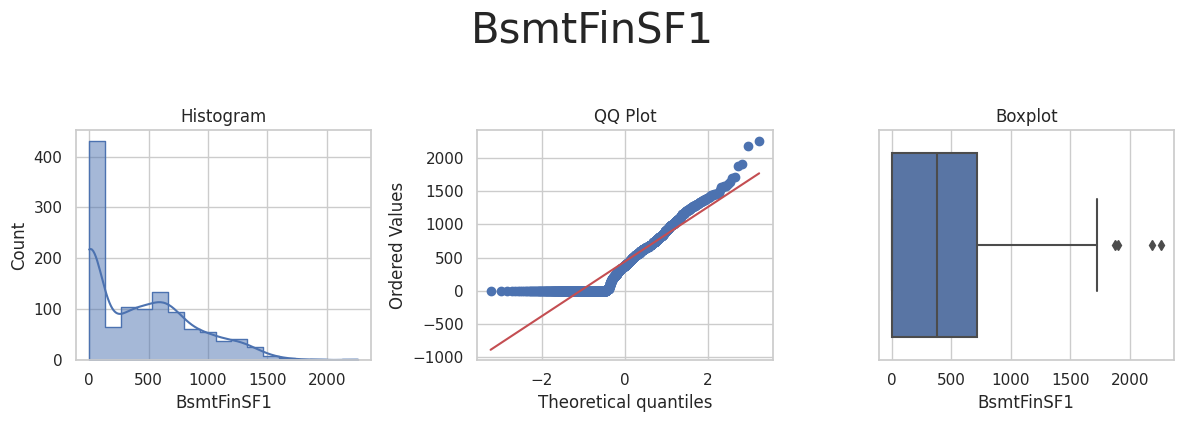

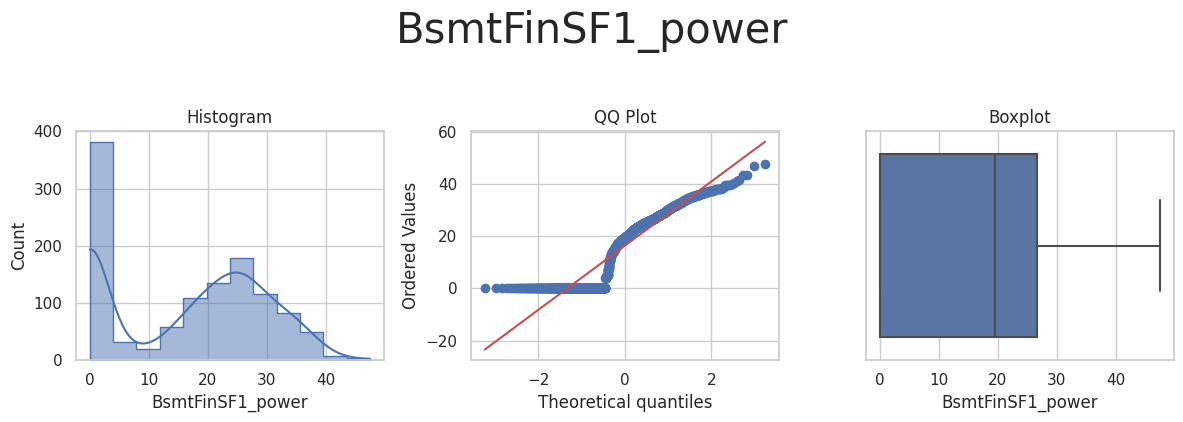

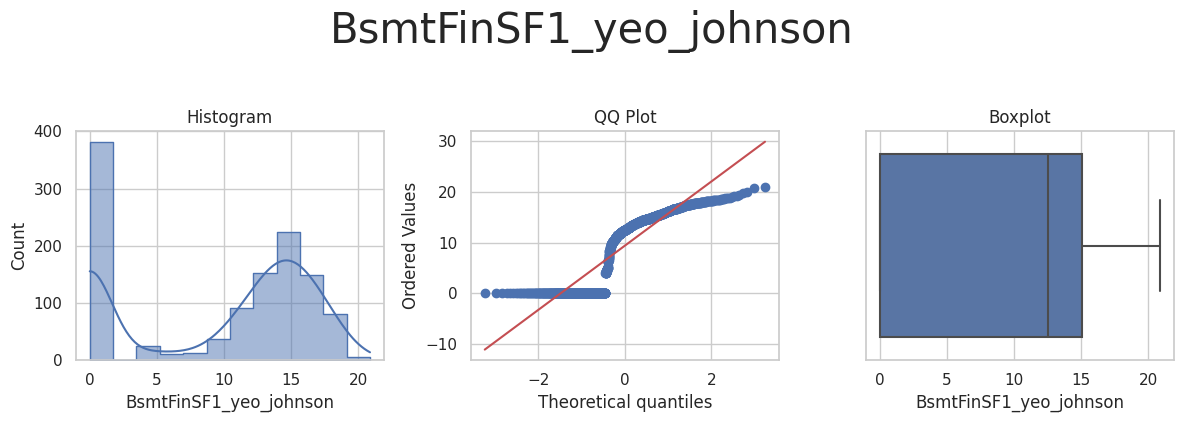



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



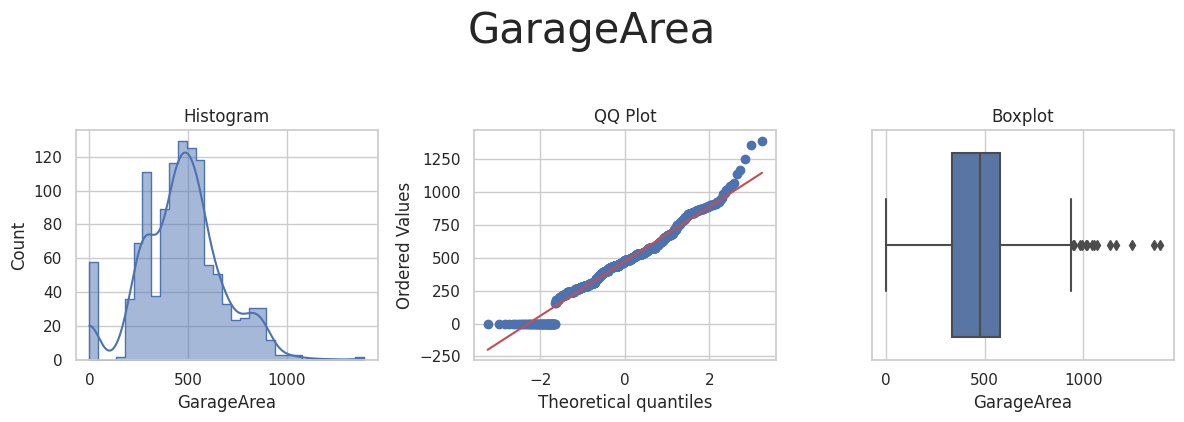

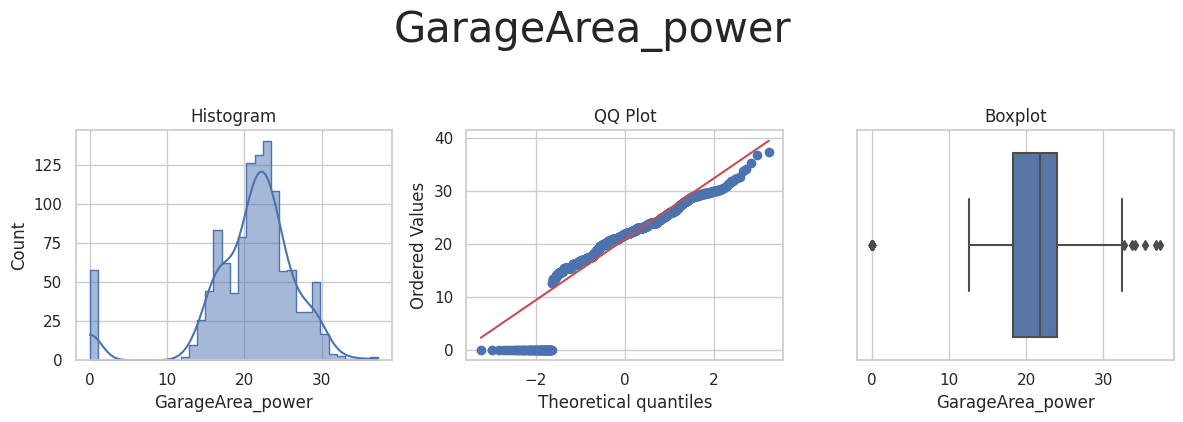

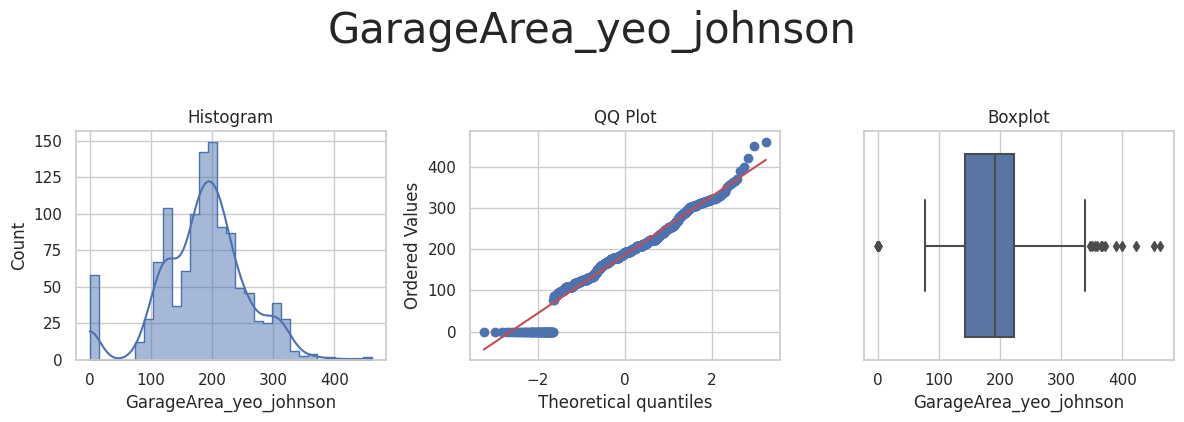



* Variable Analyzed: YearRemodAdd
* Applied transformation: ['YearRemodAdd_log_e', 'YearRemodAdd_log_10', 'YearRemodAdd_reciprocal', 'YearRemodAdd_power', 'YearRemodAdd_box_cox', 'YearRemodAdd_yeo_johnson'] 



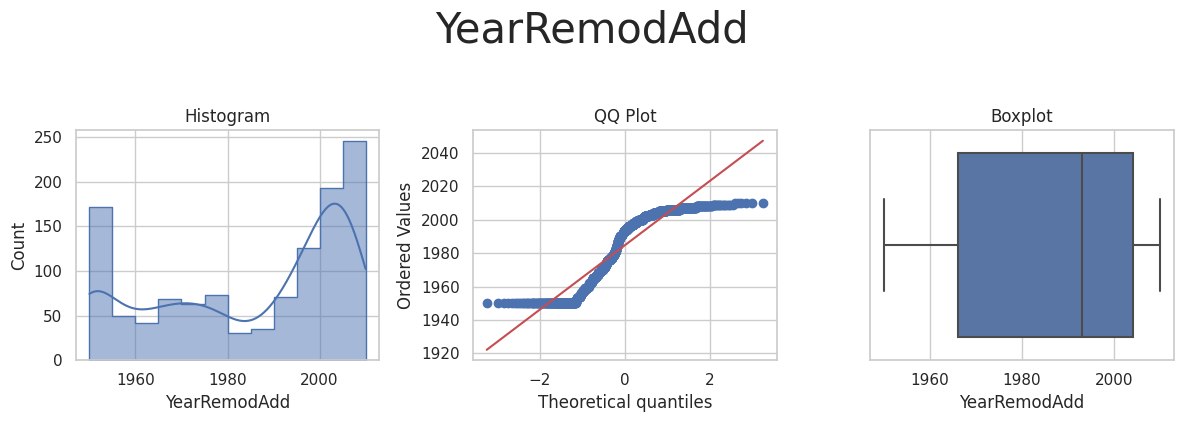

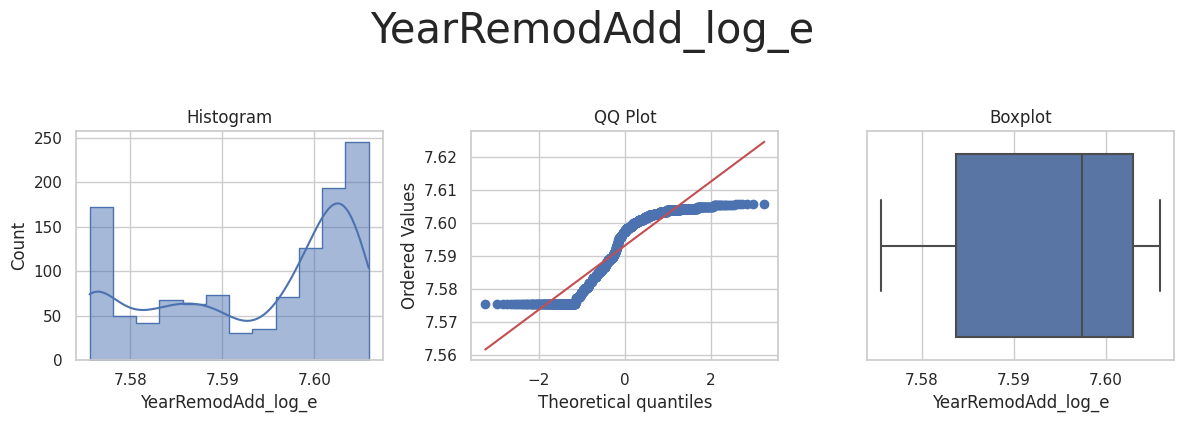

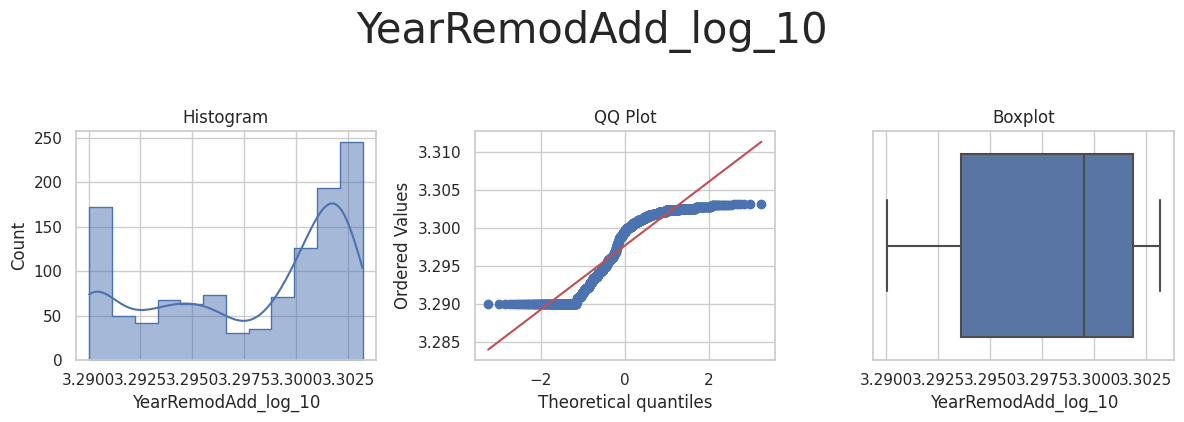

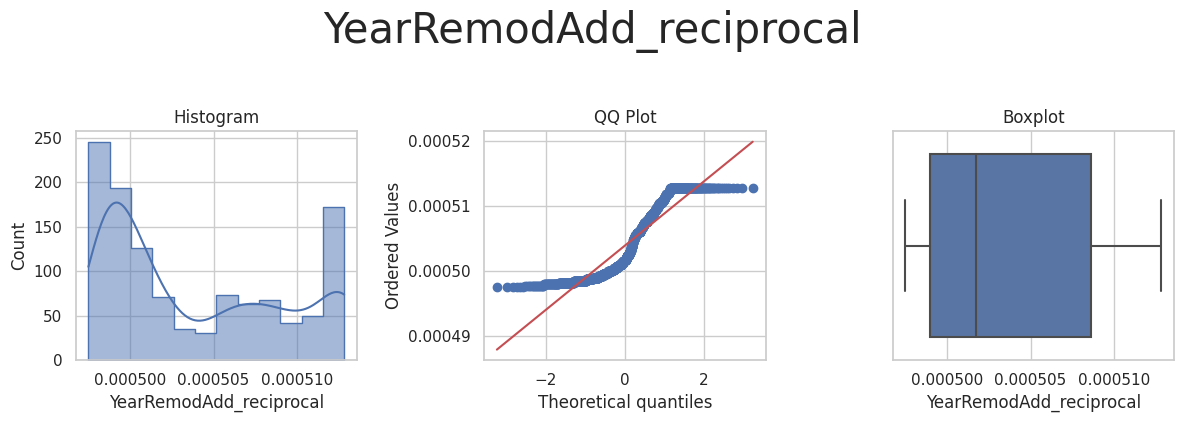

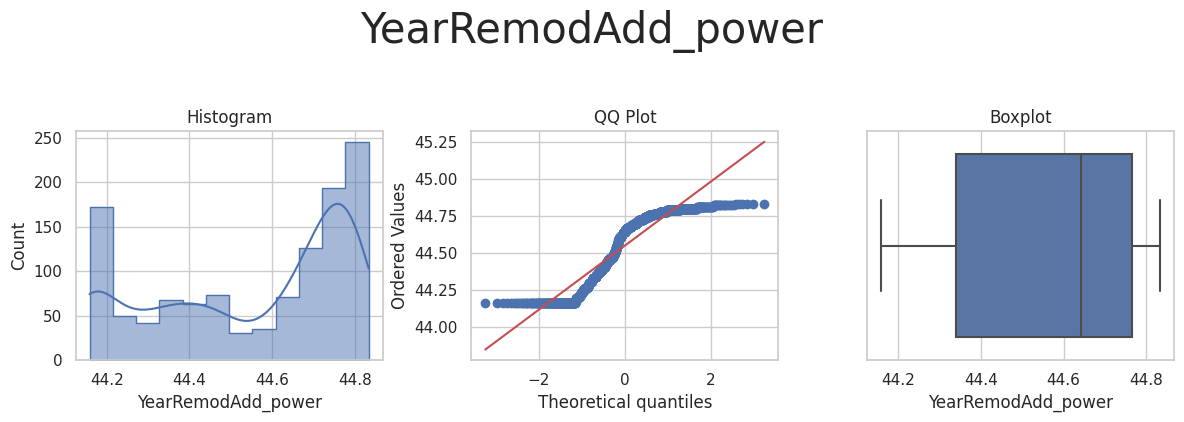

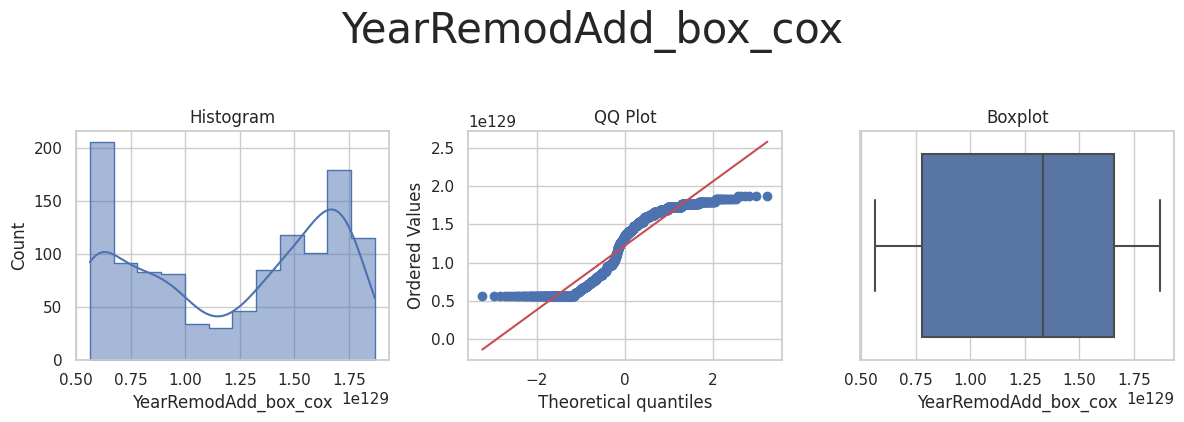

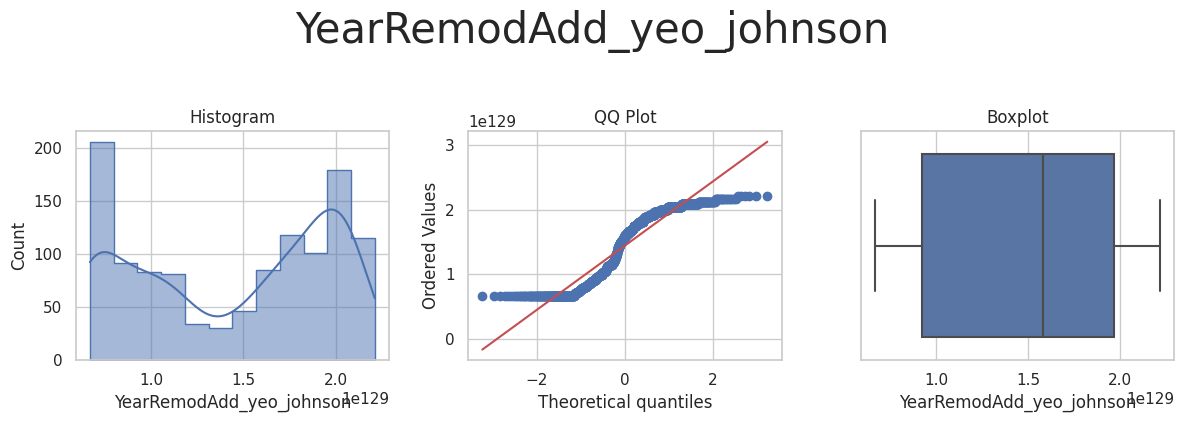



* Variable Analyzed: BsmtUnfSF
* Applied transformation: ['BsmtUnfSF_power', 'BsmtUnfSF_yeo_johnson'] 



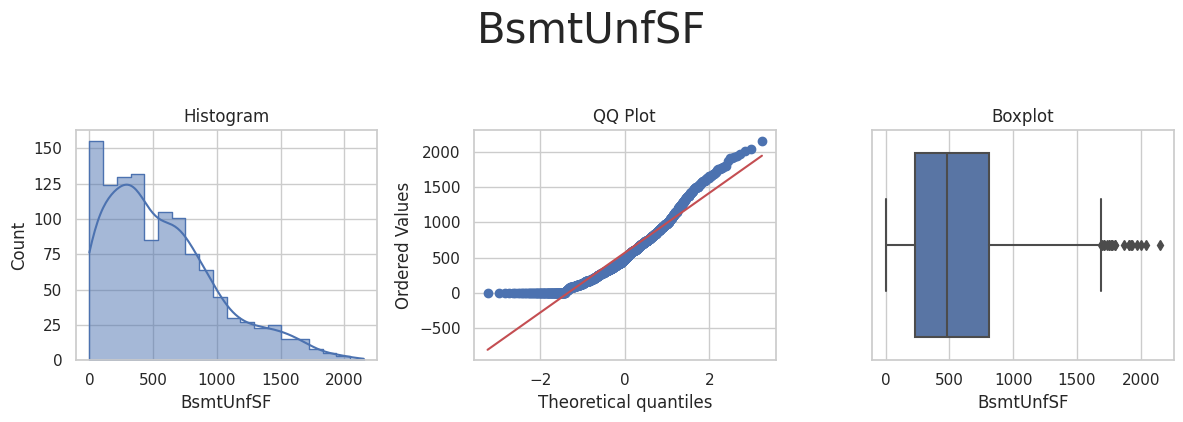

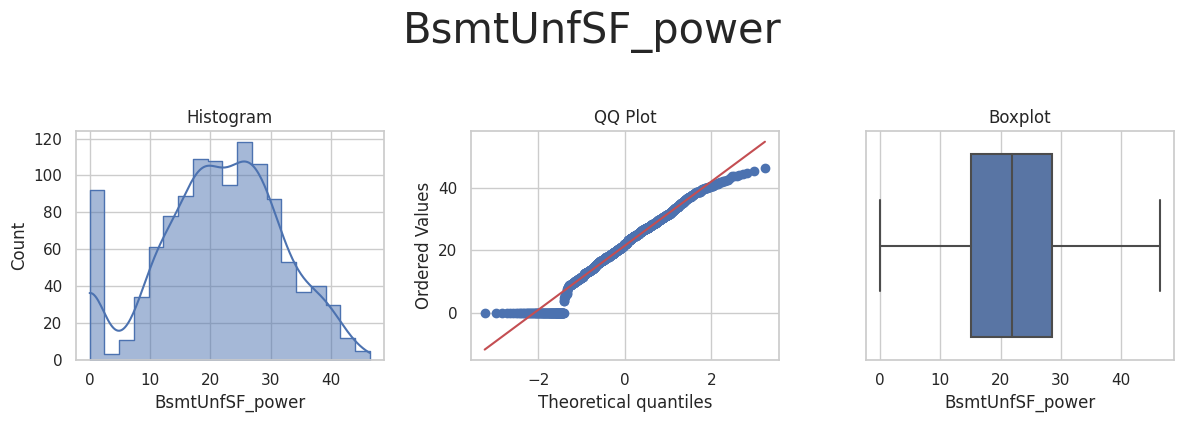

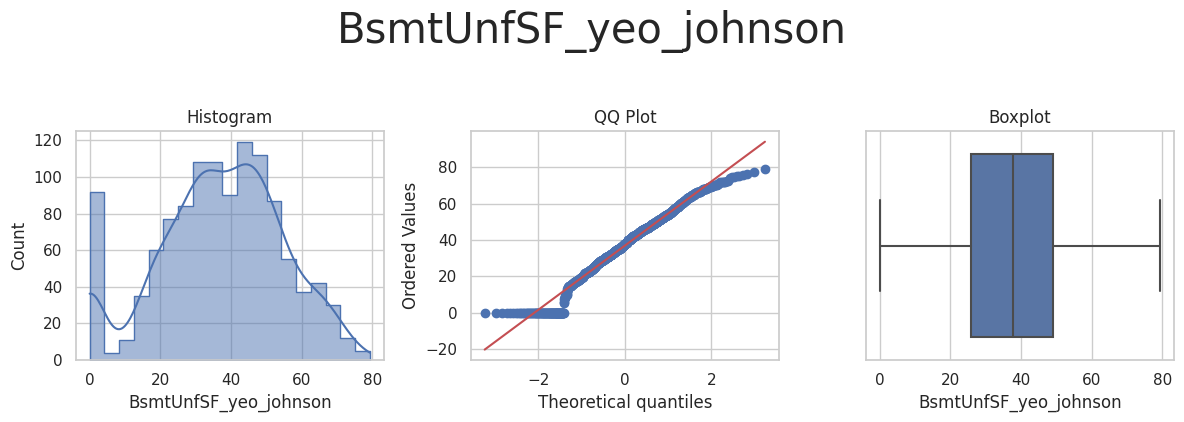



* Variable Analyzed: EnclosedPorch
* Applied transformation: ['EnclosedPorch_power', 'EnclosedPorch_yeo_johnson'] 



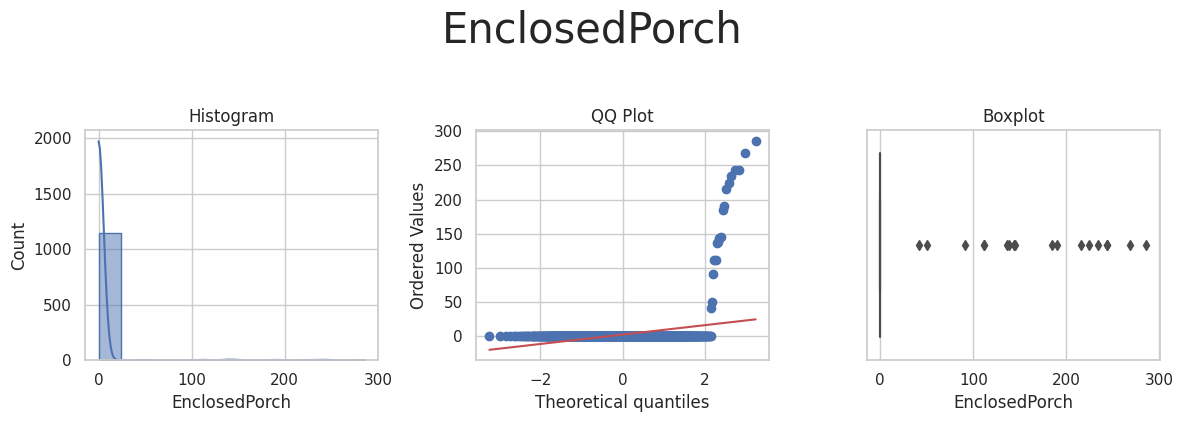

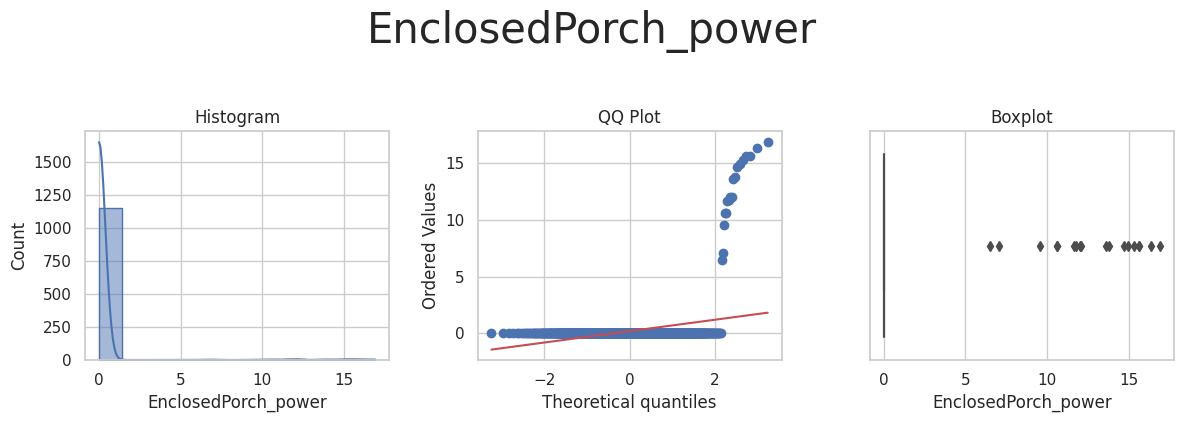

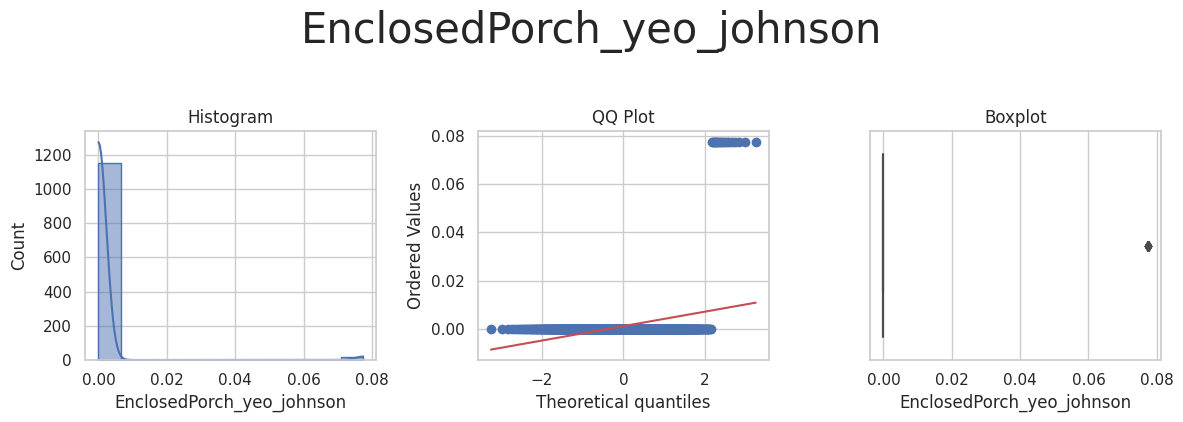



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



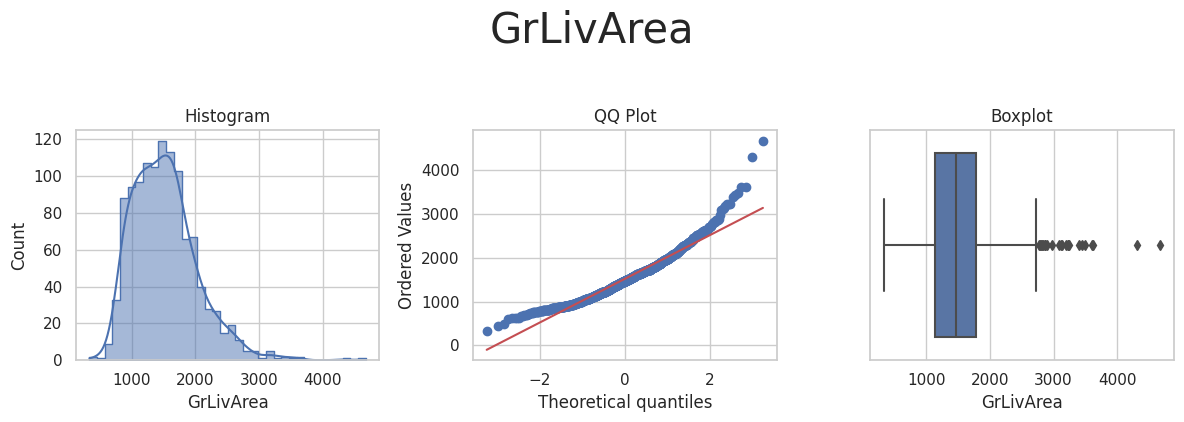

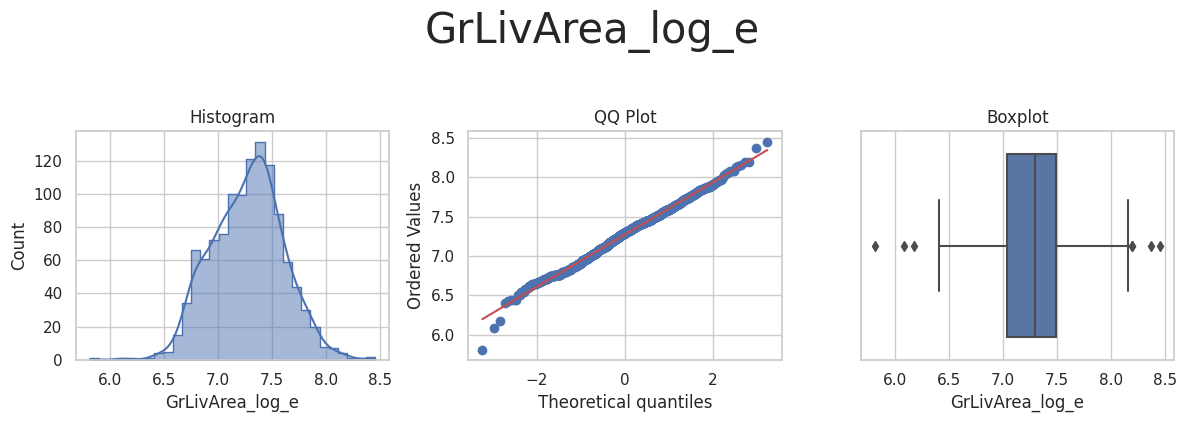

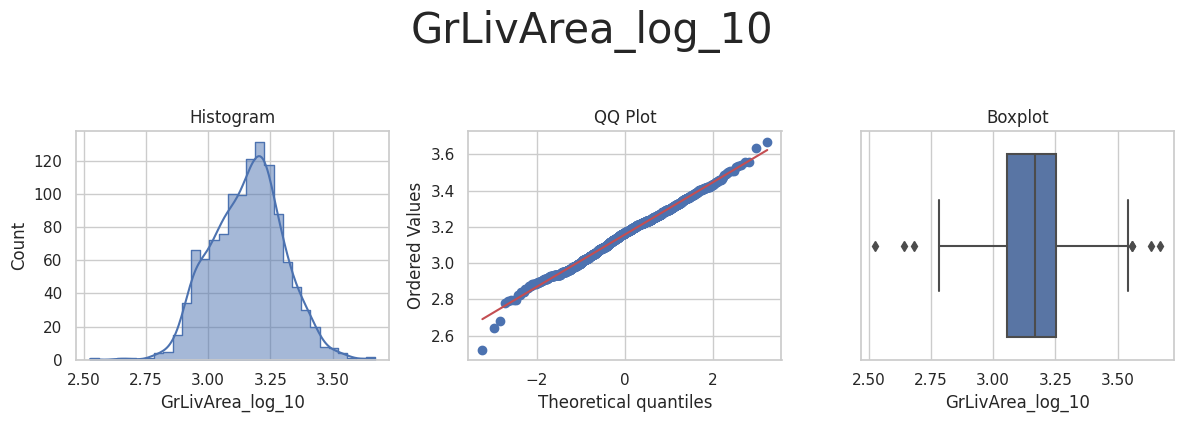

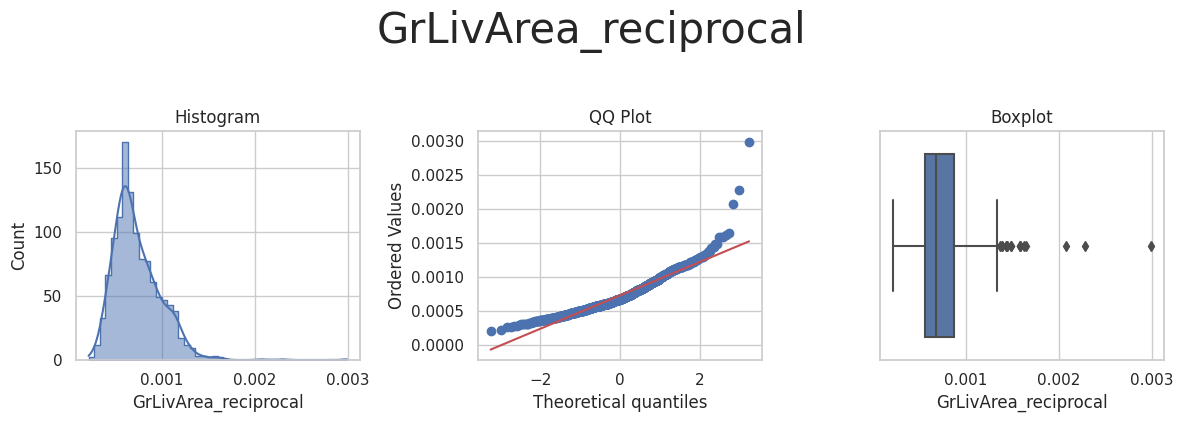

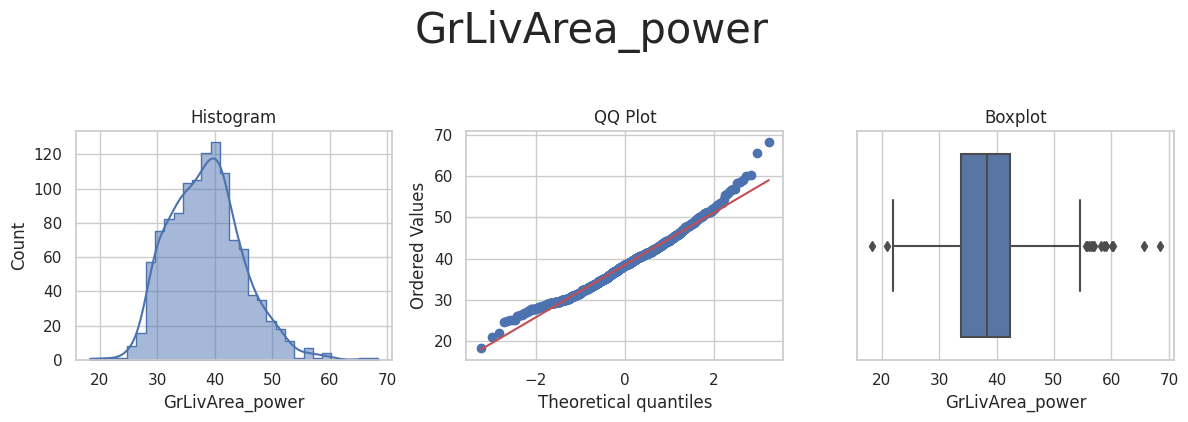

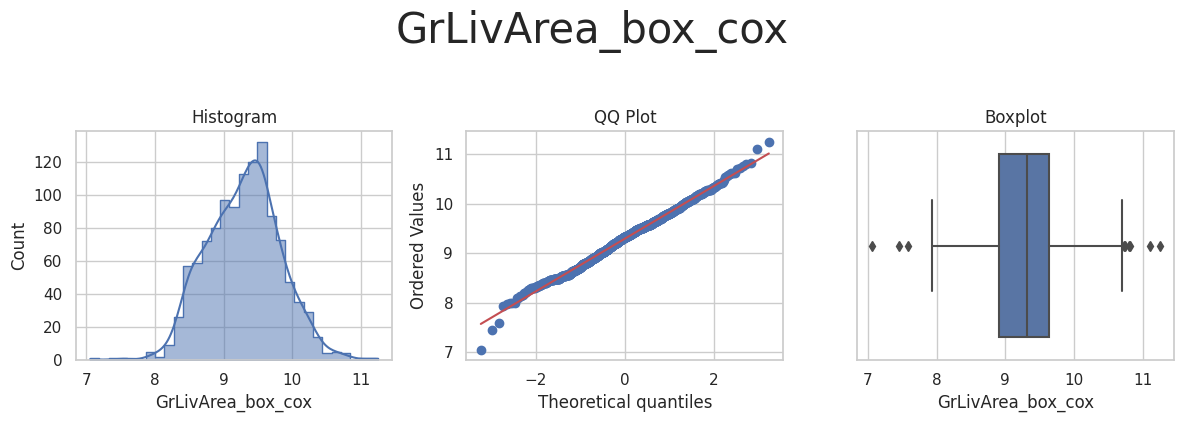

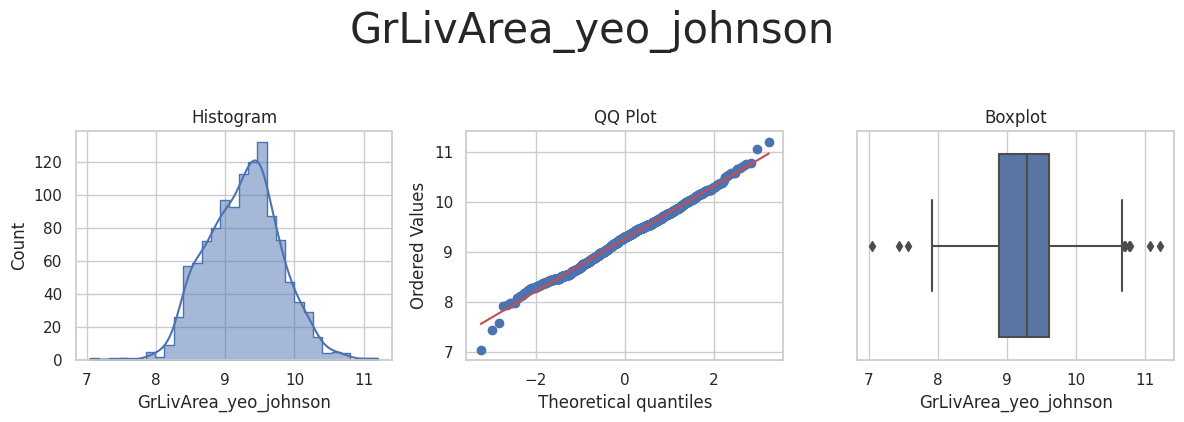



* Variable Analyzed: GarageYrBlt
* Applied transformation: ['GarageYrBlt_log_e', 'GarageYrBlt_log_10', 'GarageYrBlt_reciprocal', 'GarageYrBlt_power', 'GarageYrBlt_box_cox', 'GarageYrBlt_yeo_johnson'] 



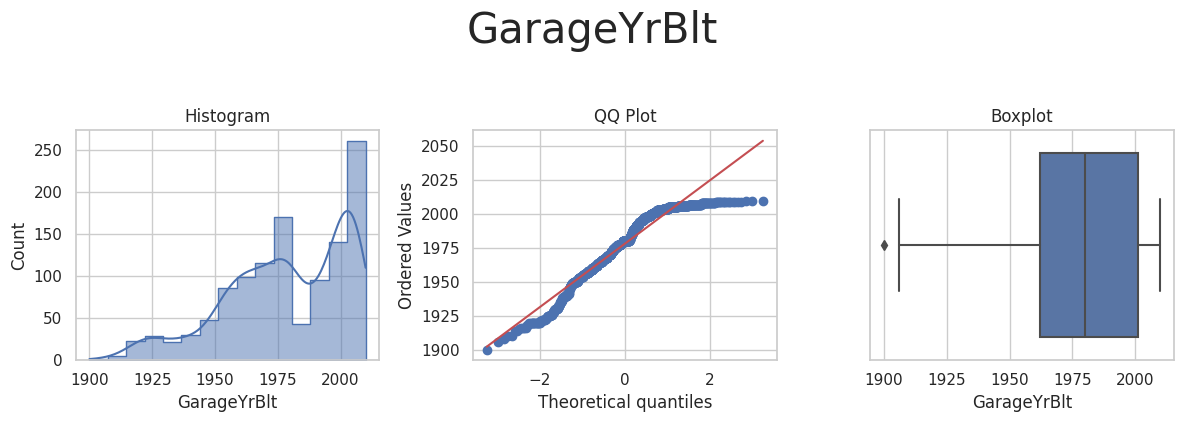

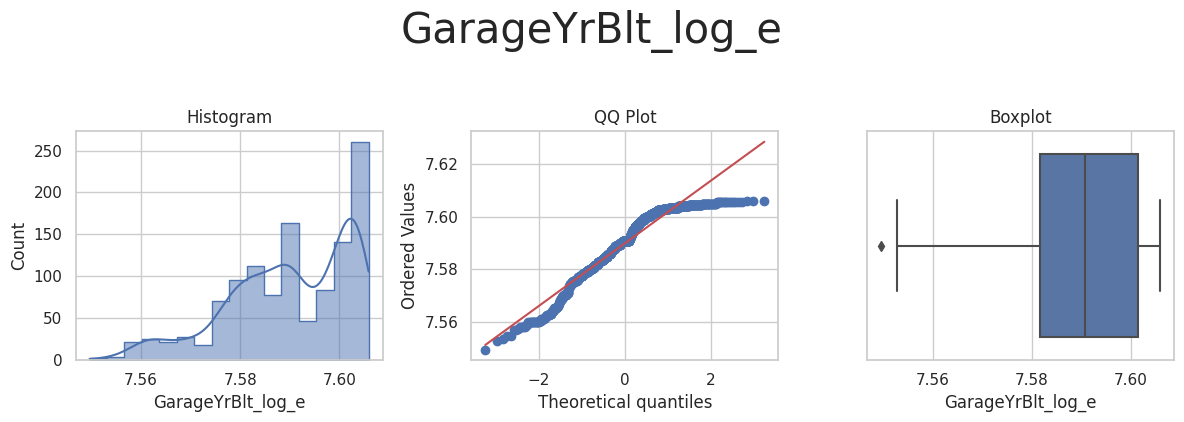

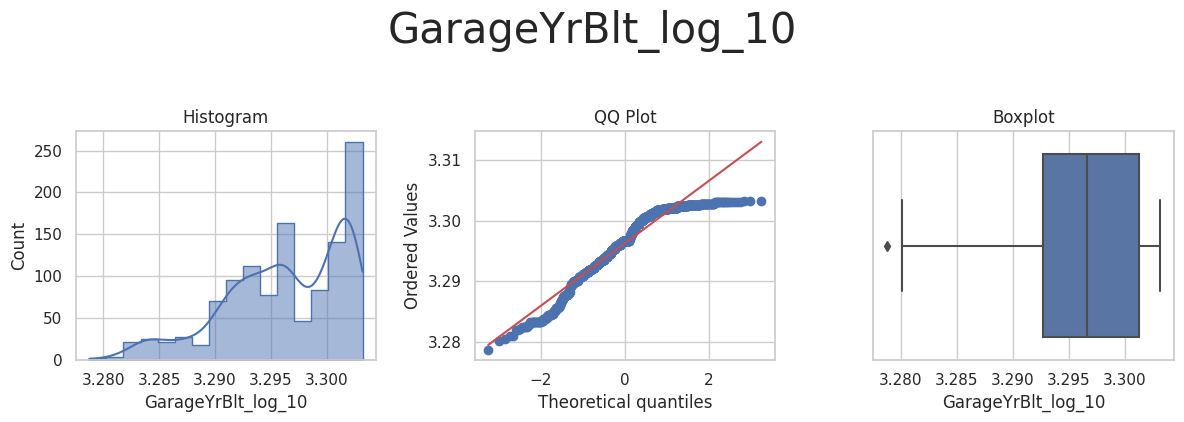

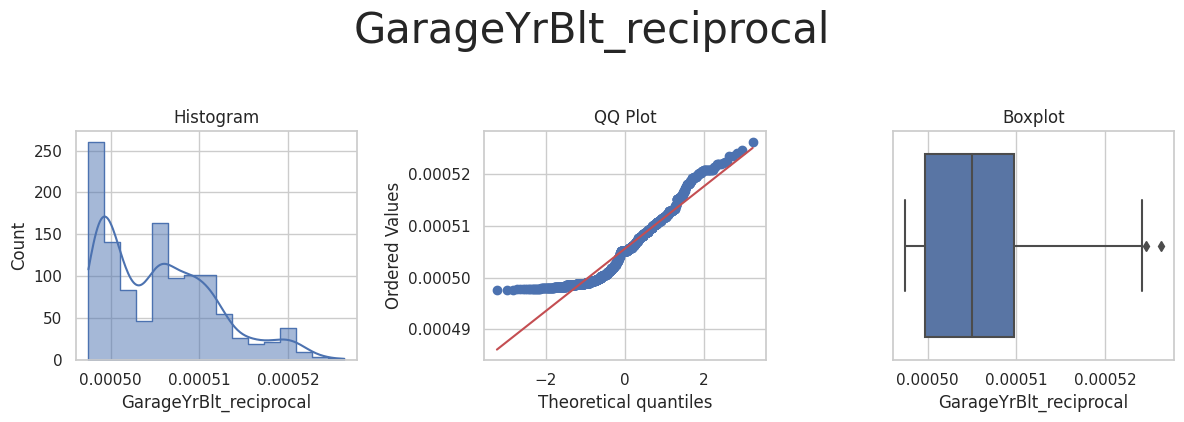

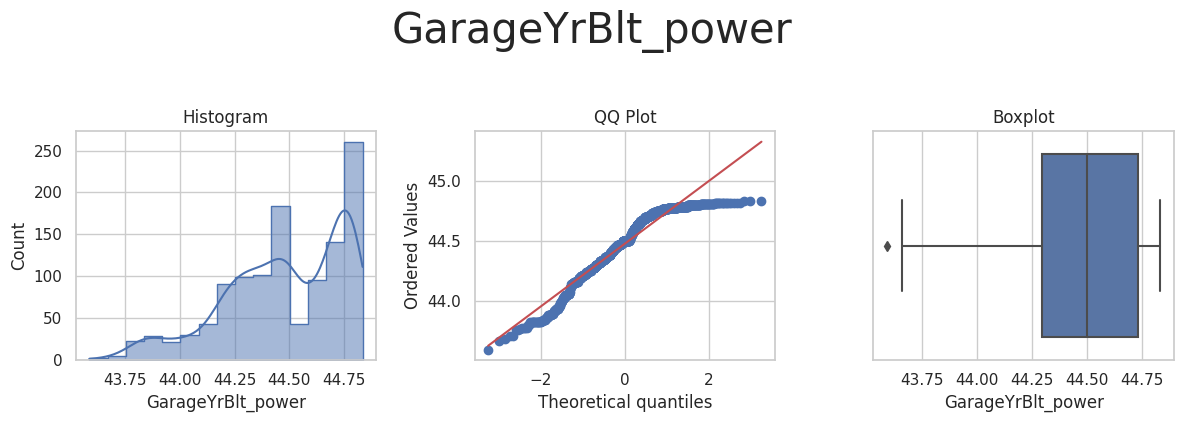

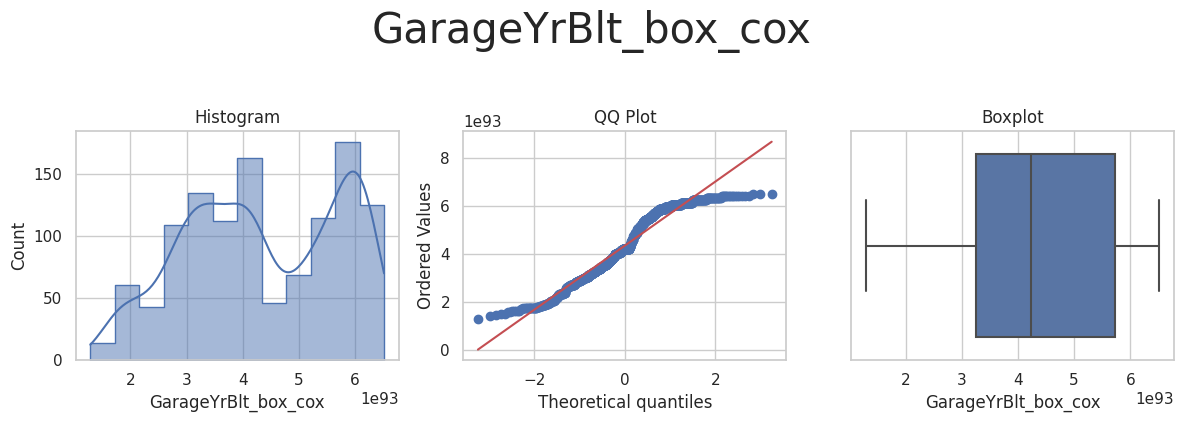

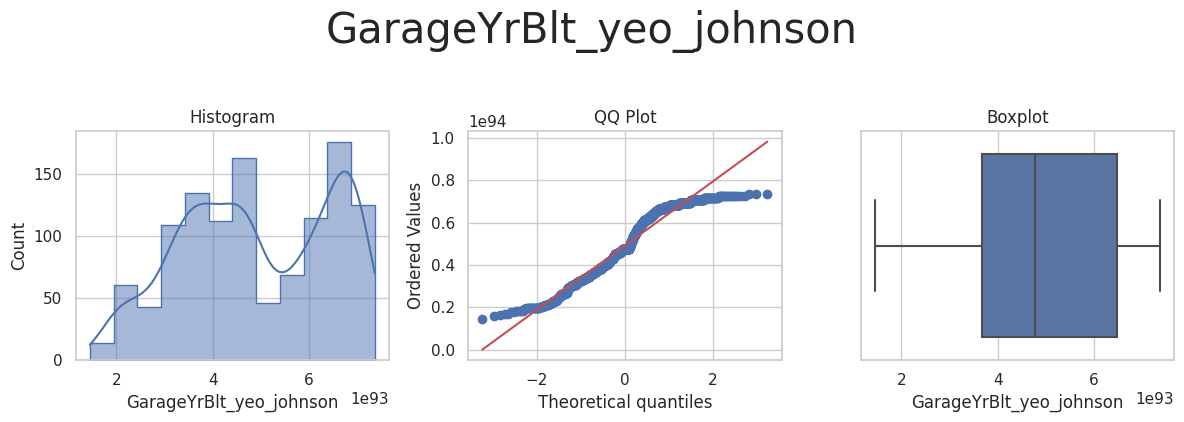



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



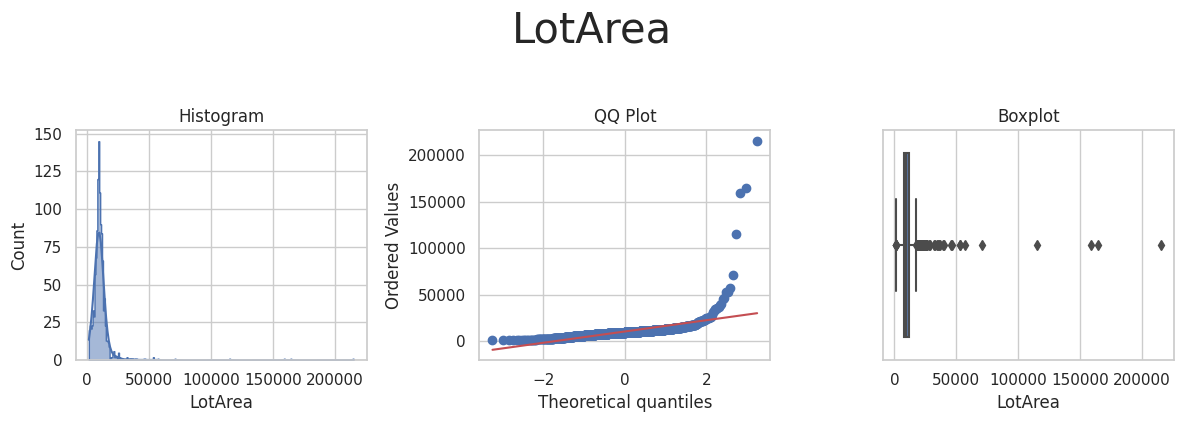

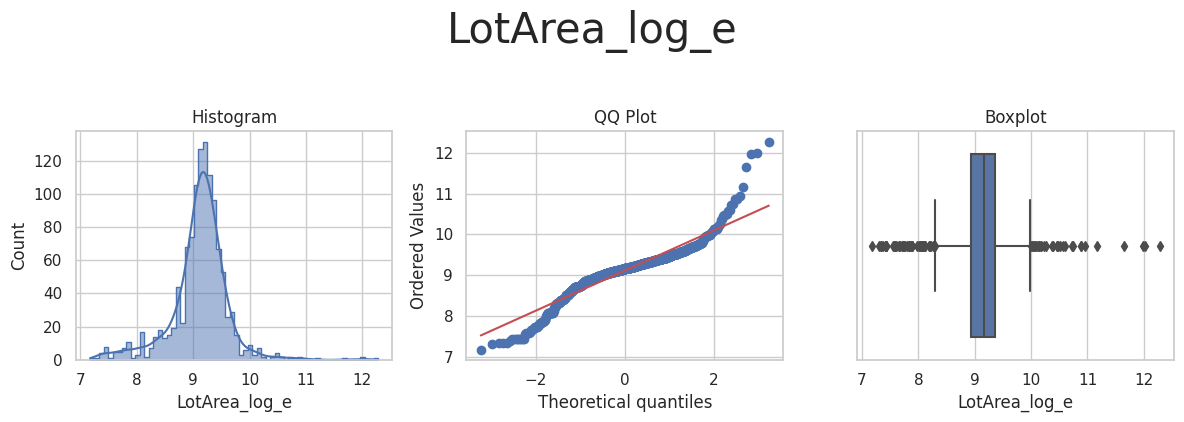

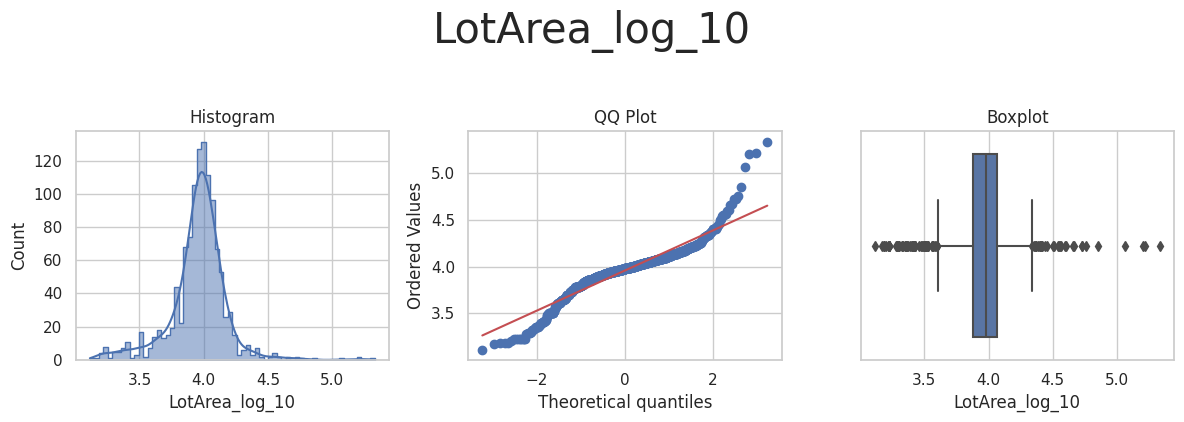

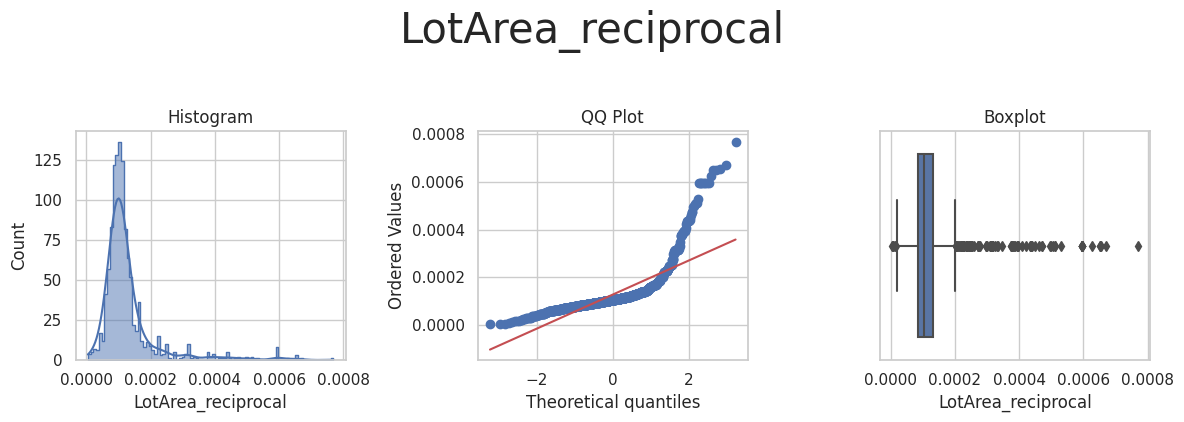

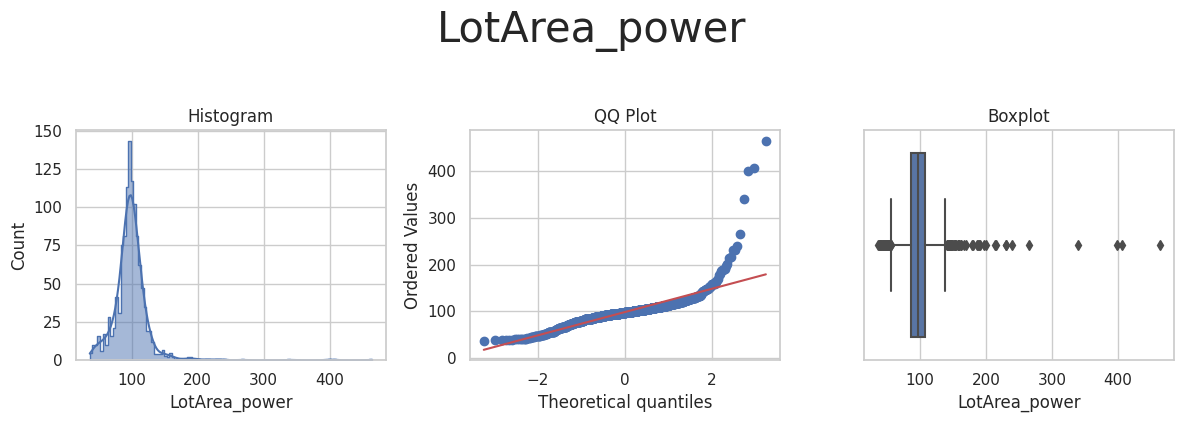

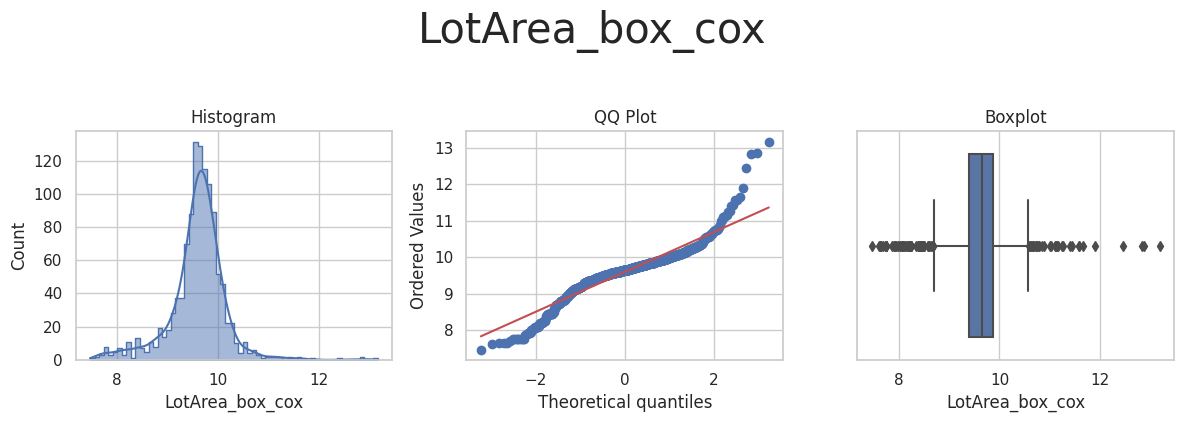

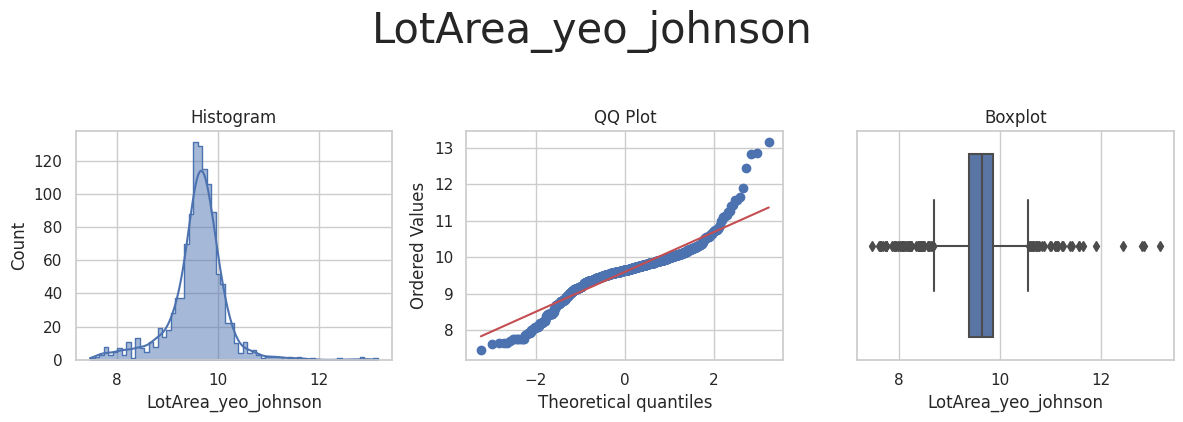



* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_log_e', 'YearBuilt_log_10', 'YearBuilt_reciprocal', 'YearBuilt_power', 'YearBuilt_box_cox', 'YearBuilt_yeo_johnson'] 



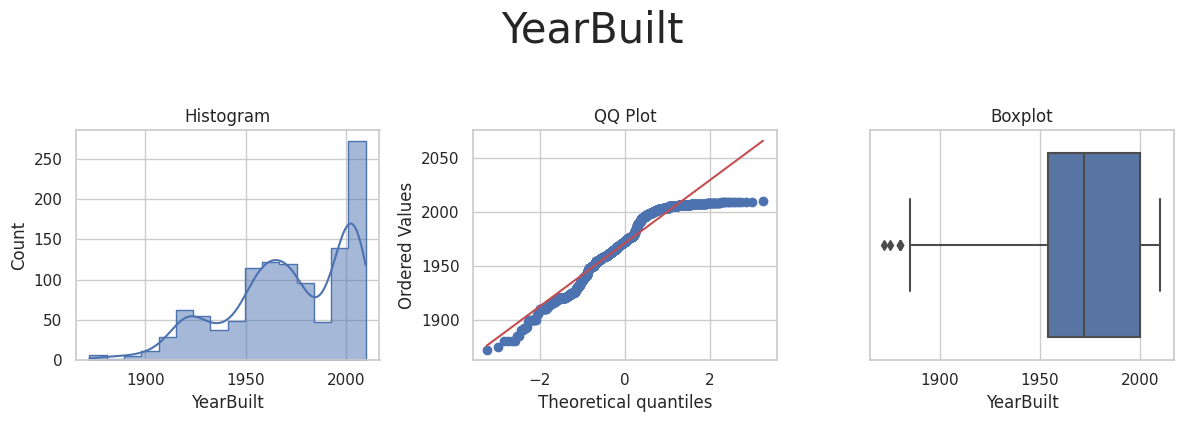

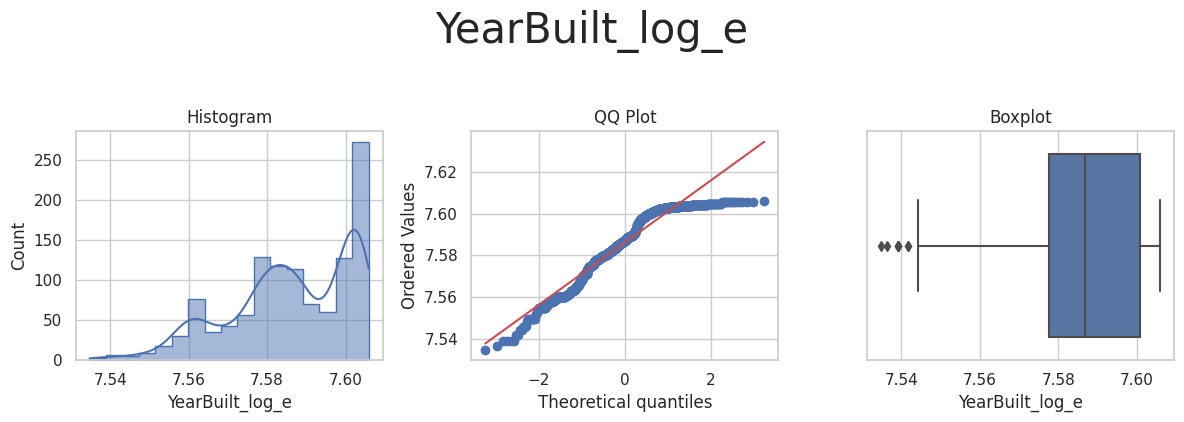

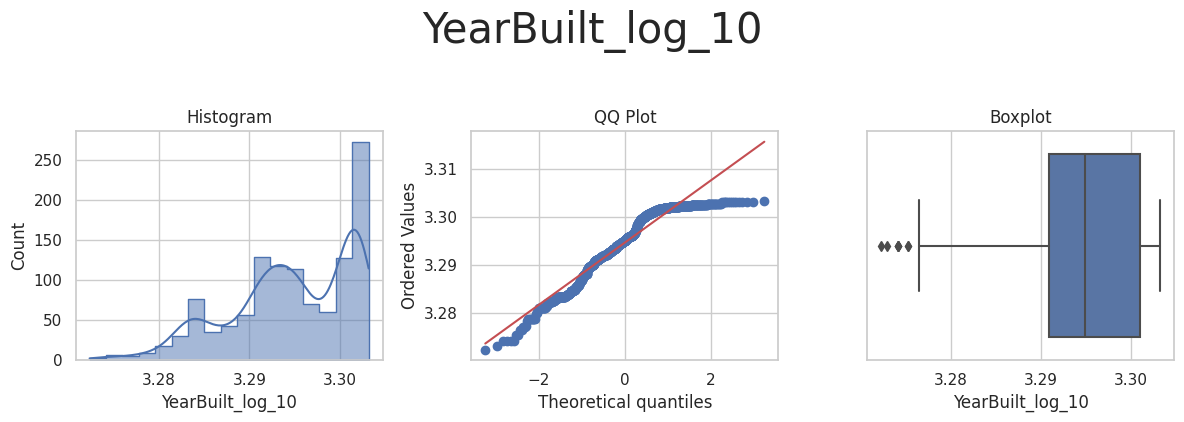

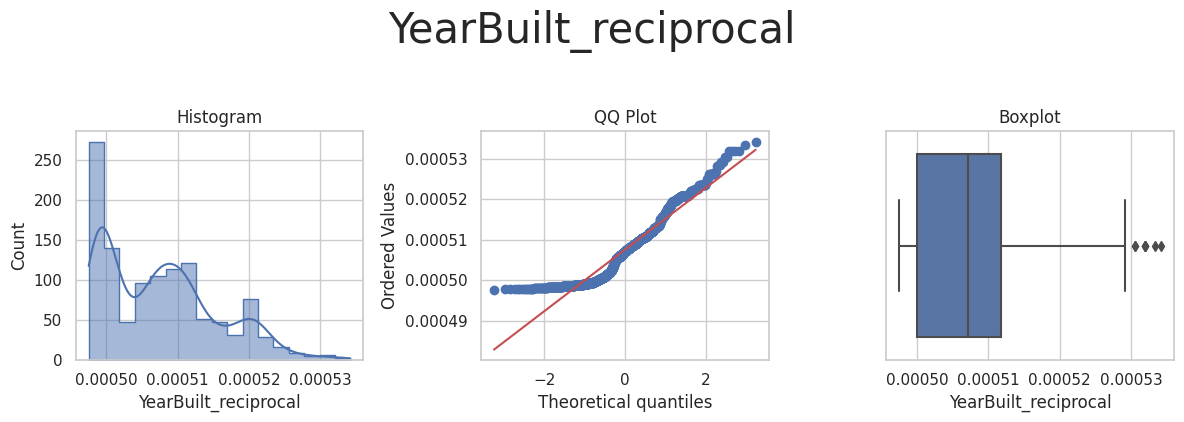

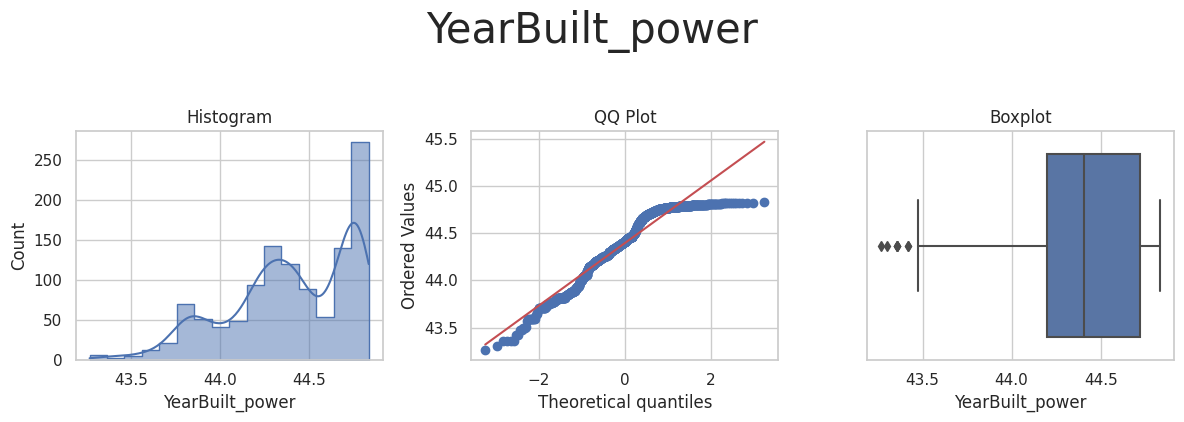

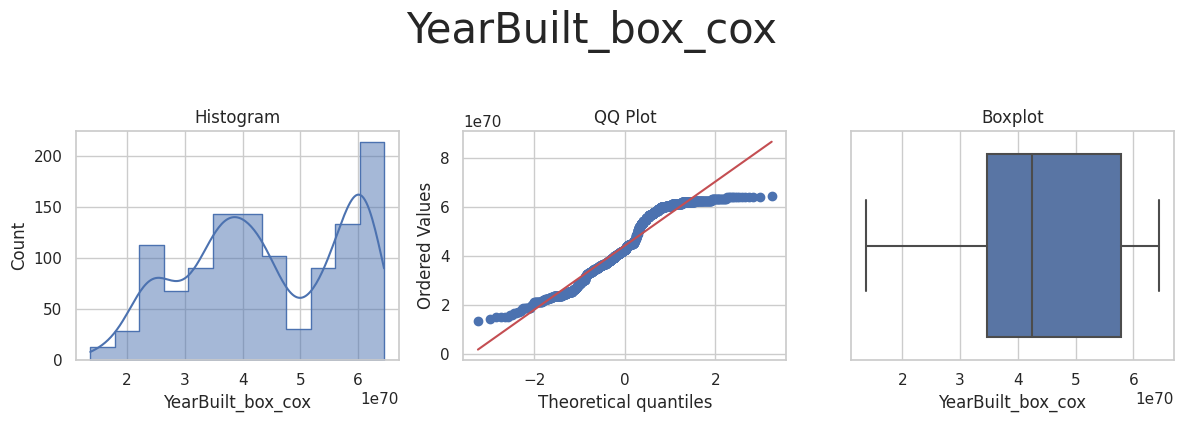

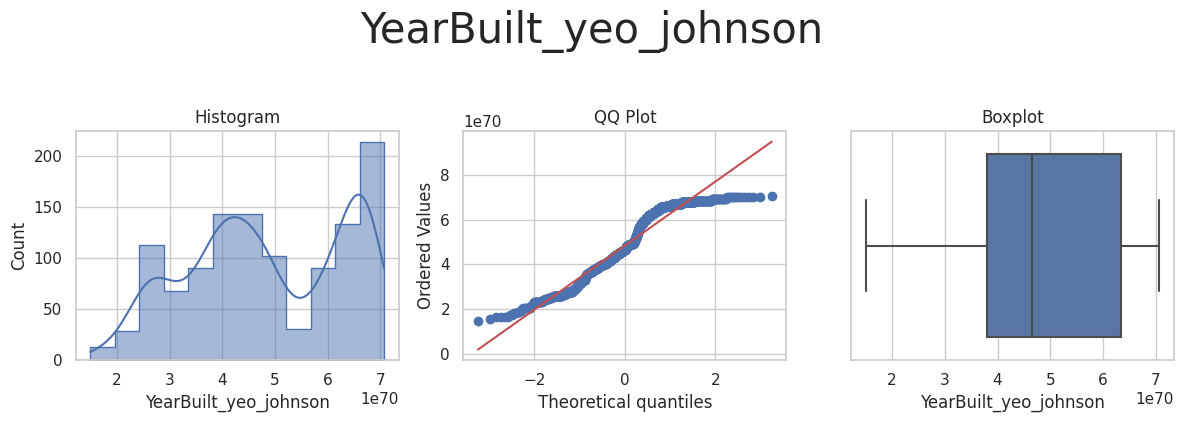



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



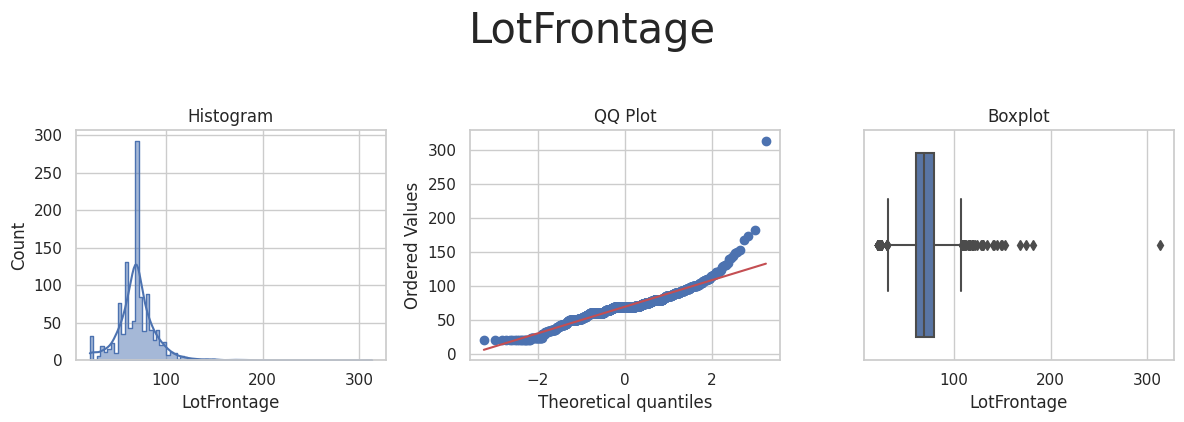

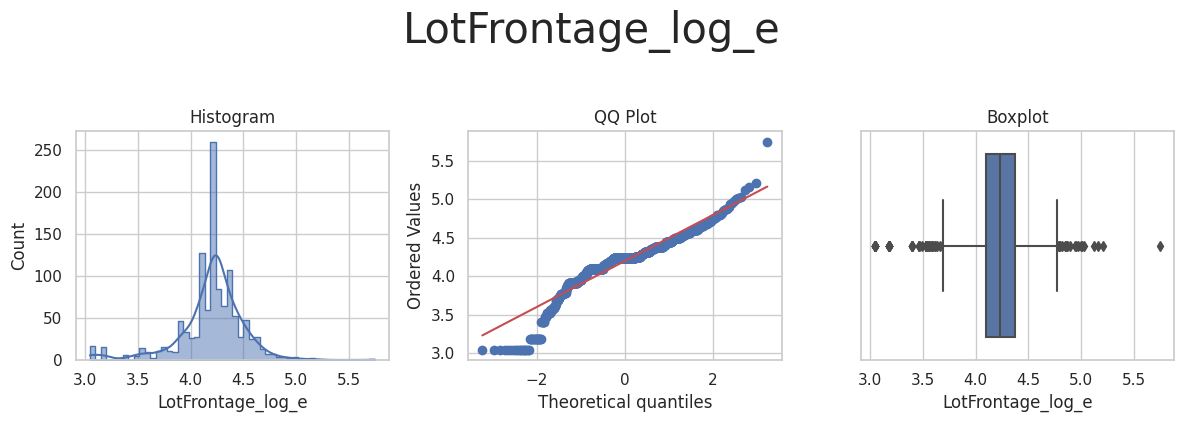

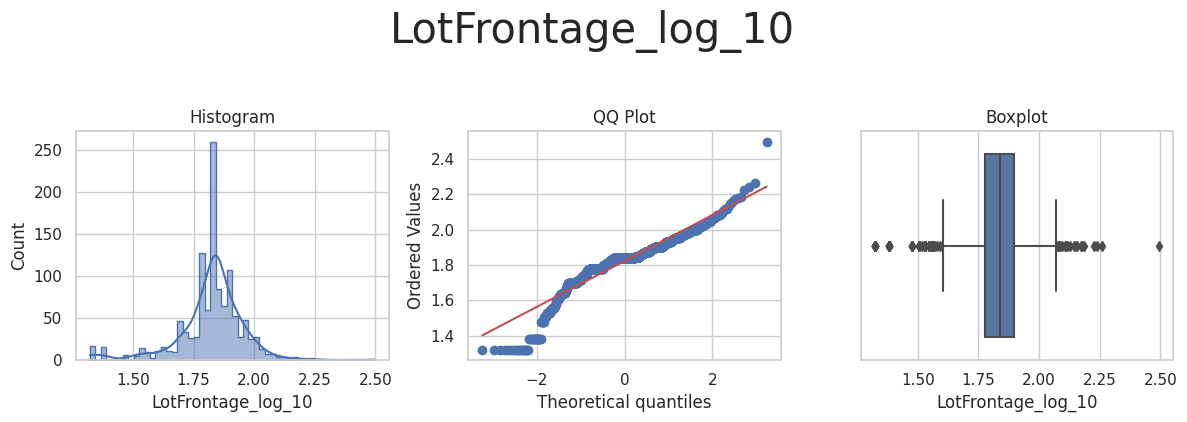

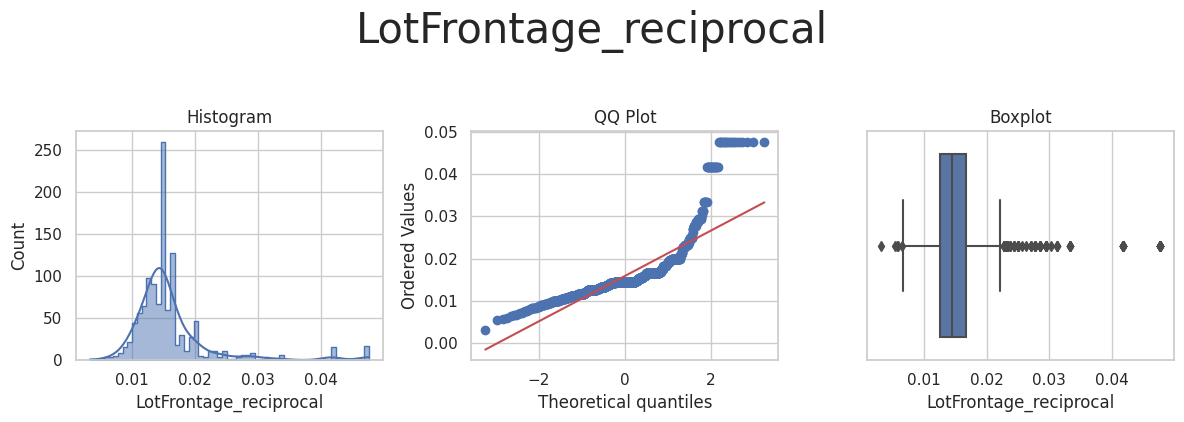

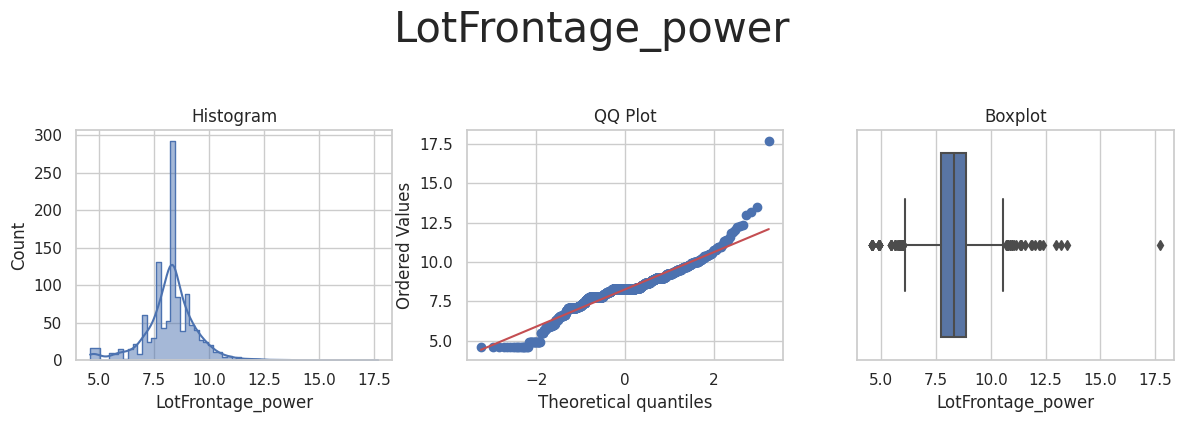

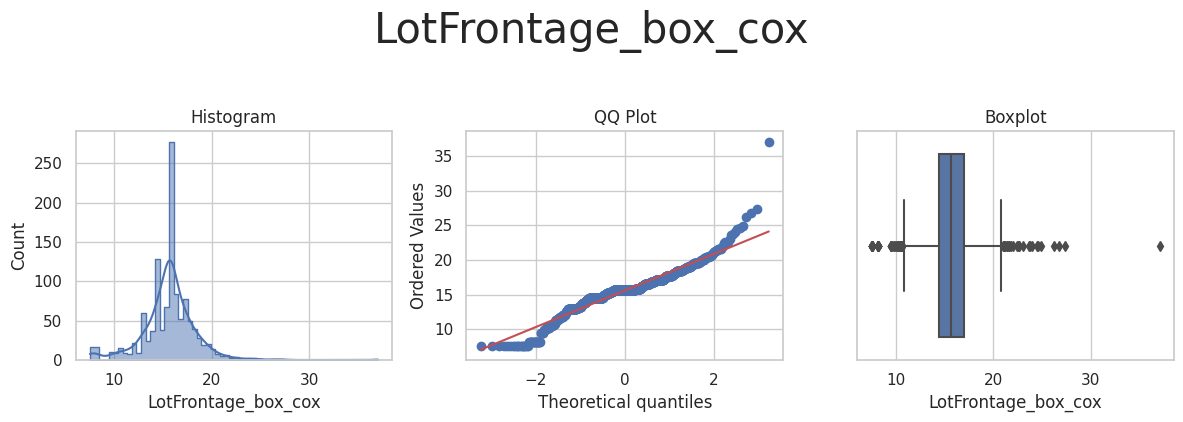

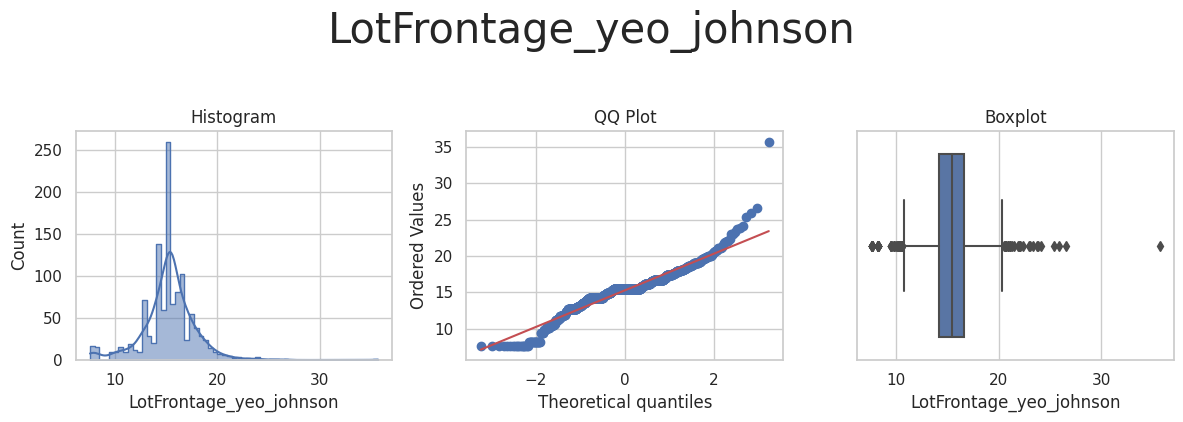



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_power', 'MasVnrArea_yeo_johnson'] 



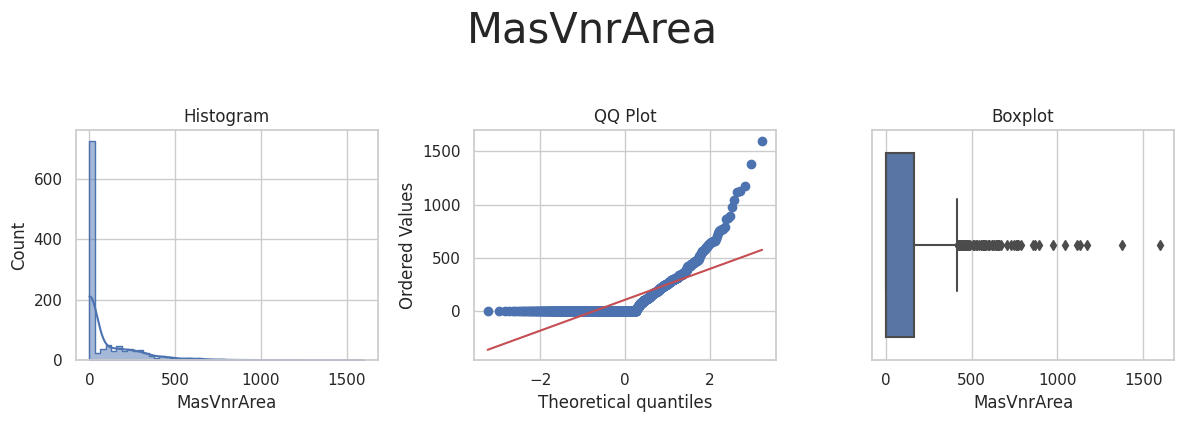

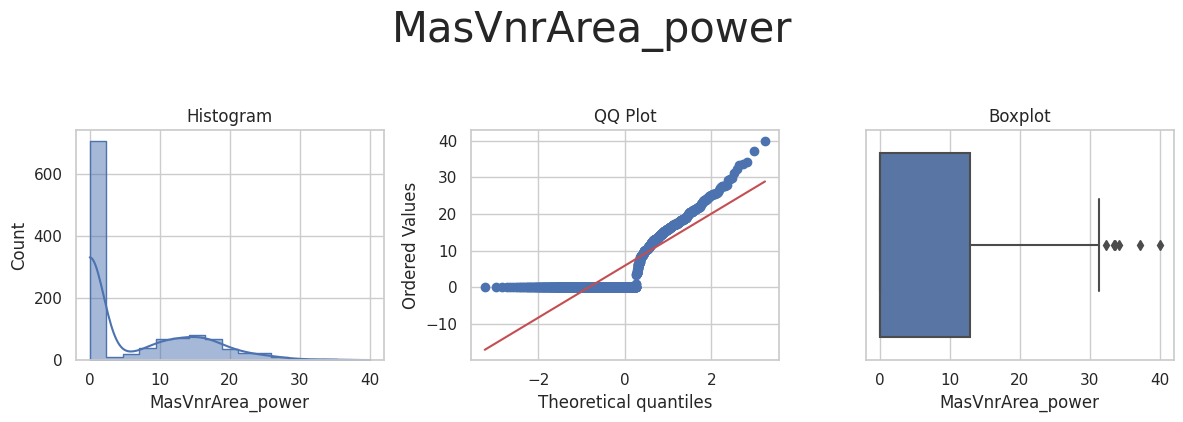

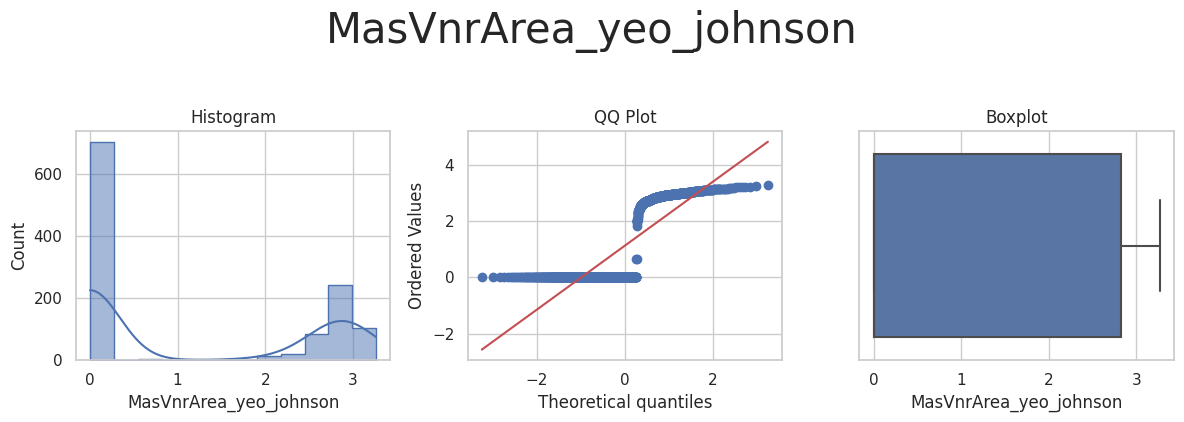



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



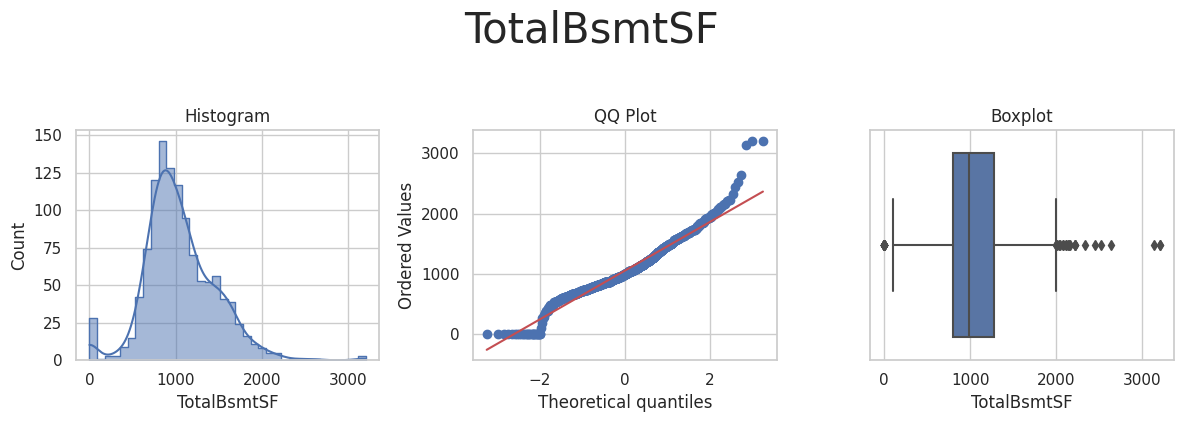

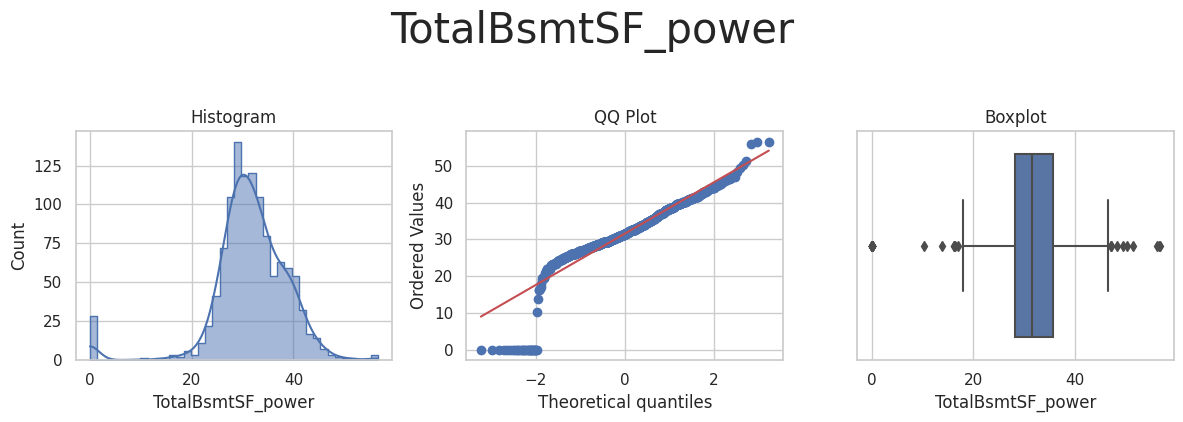

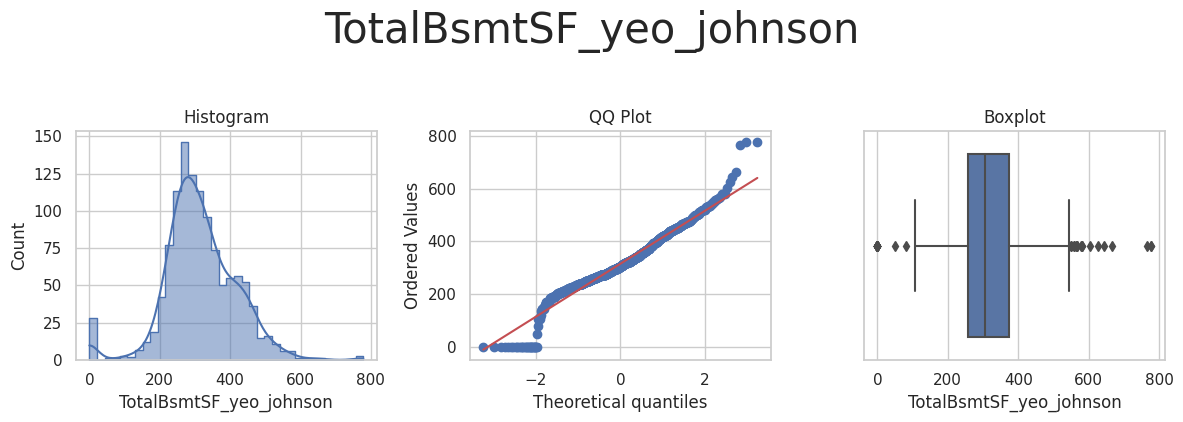



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_power', 'OpenPorchSF_yeo_johnson'] 



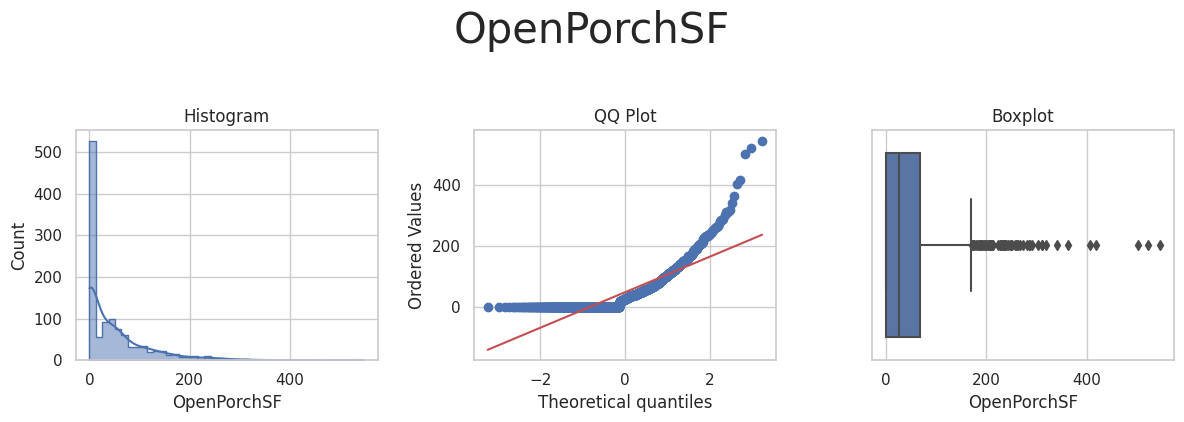

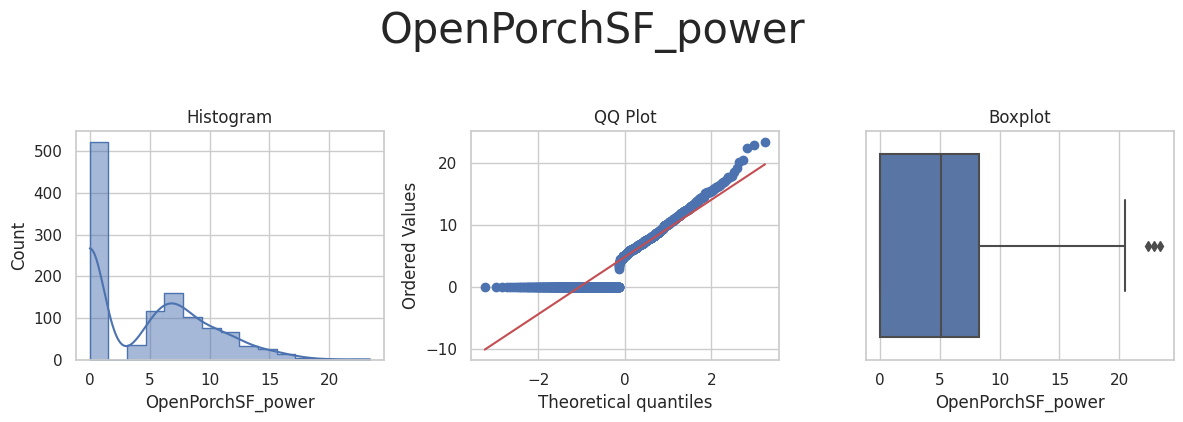

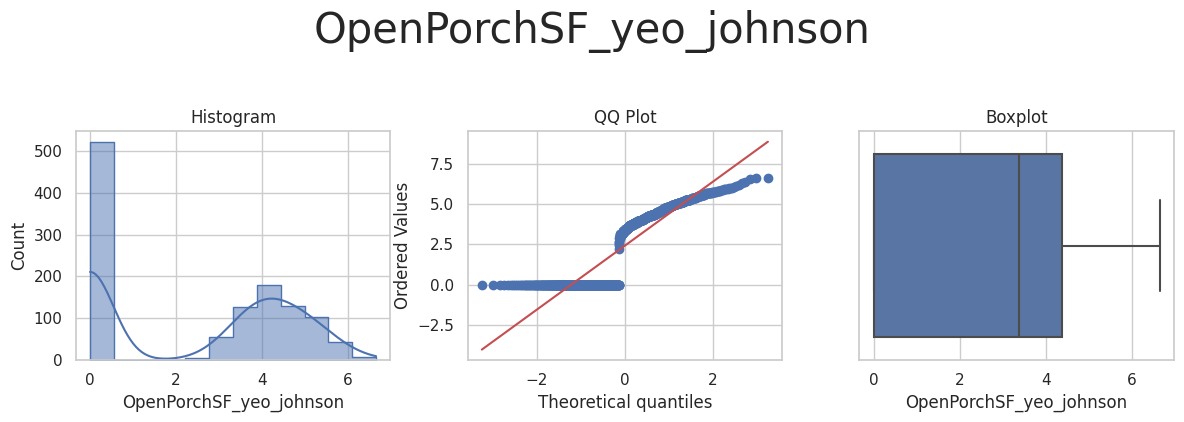



* Variable Analyzed: OverallCond
* Applied transformation: ['OverallCond_log_e', 'OverallCond_log_10', 'OverallCond_reciprocal', 'OverallCond_power', 'OverallCond_box_cox', 'OverallCond_yeo_johnson'] 



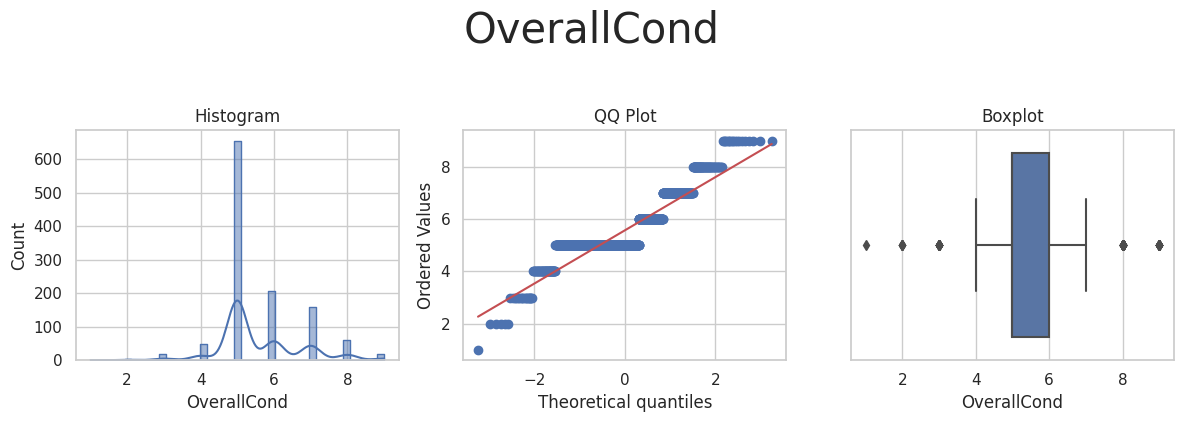

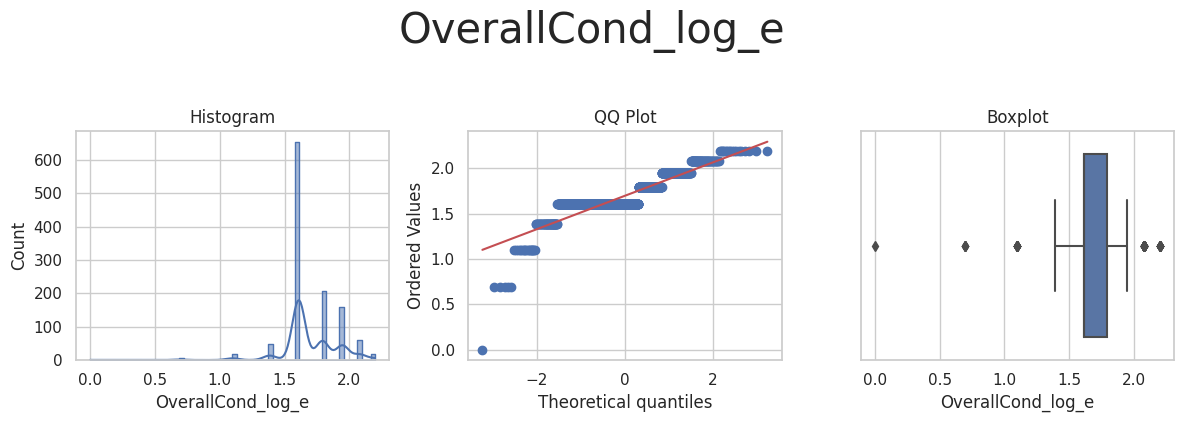

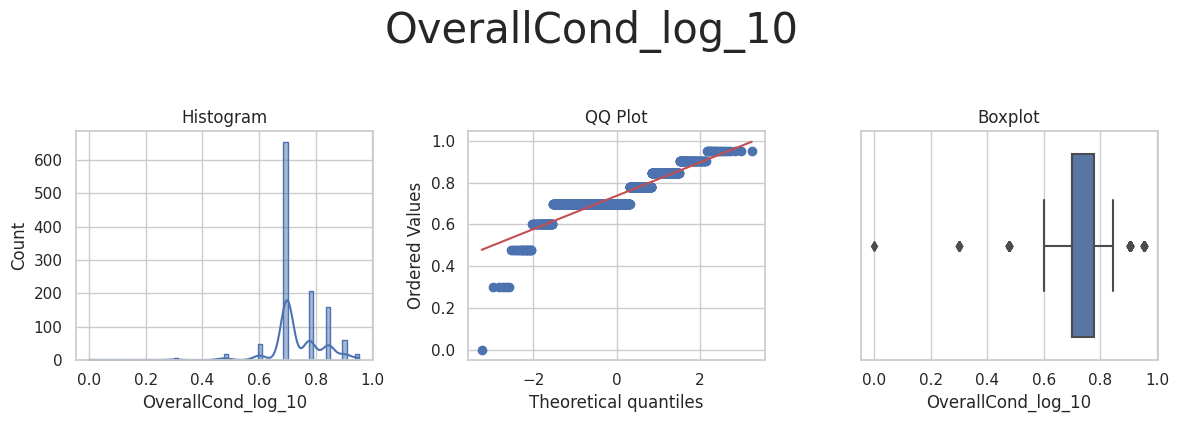

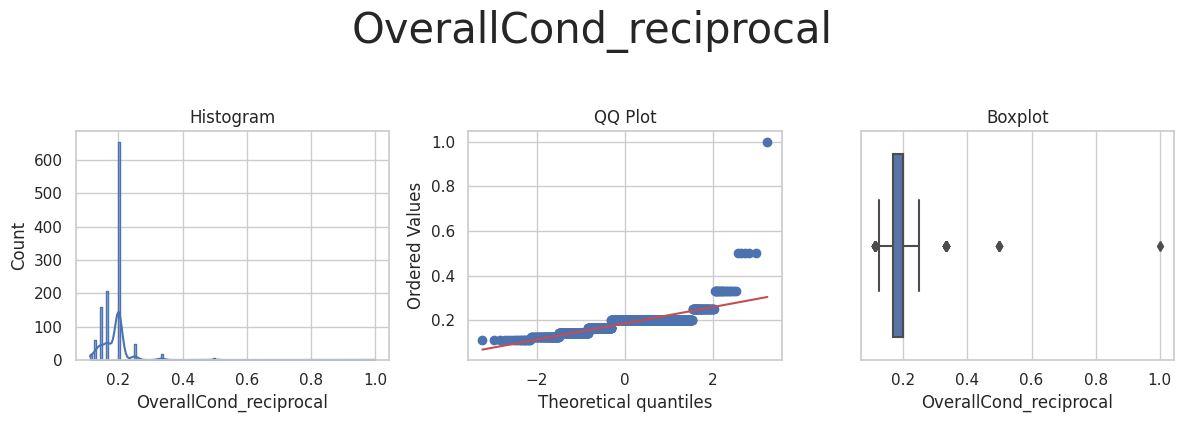

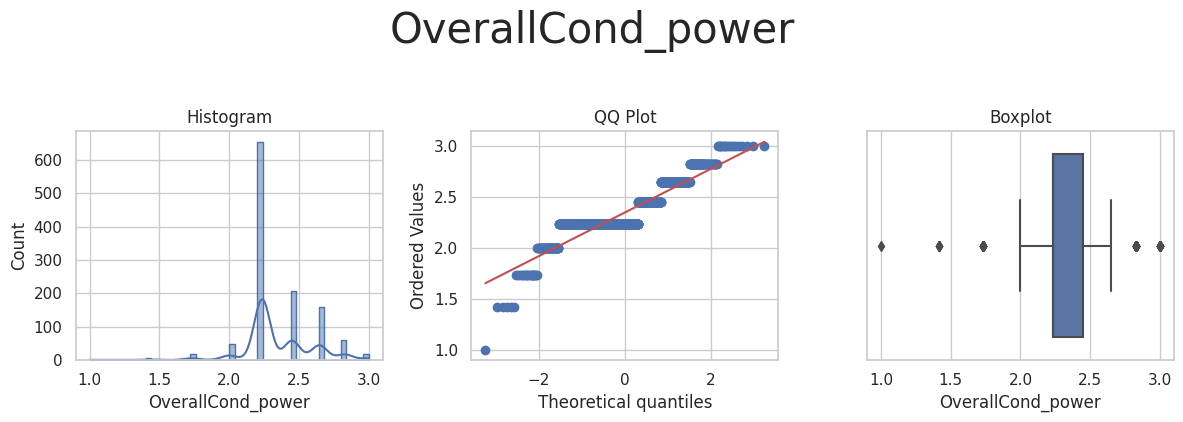

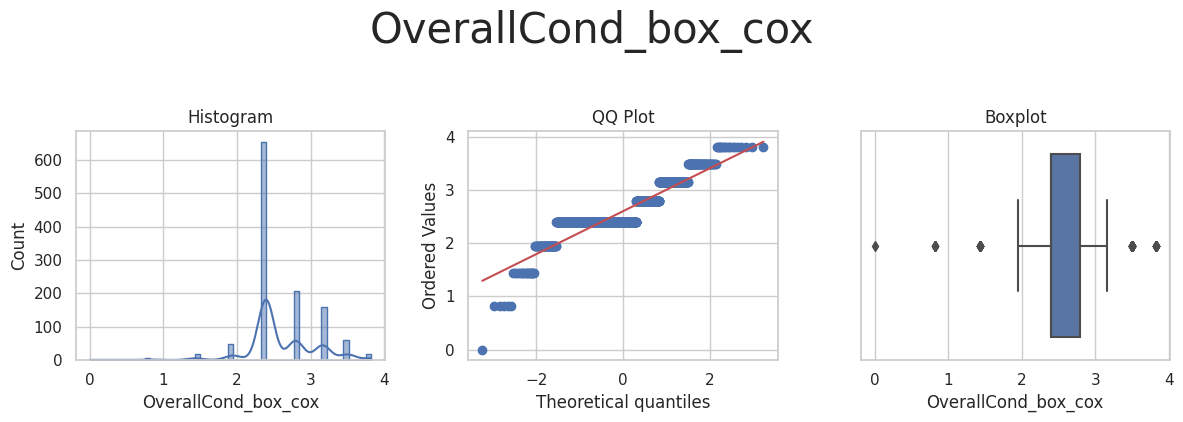

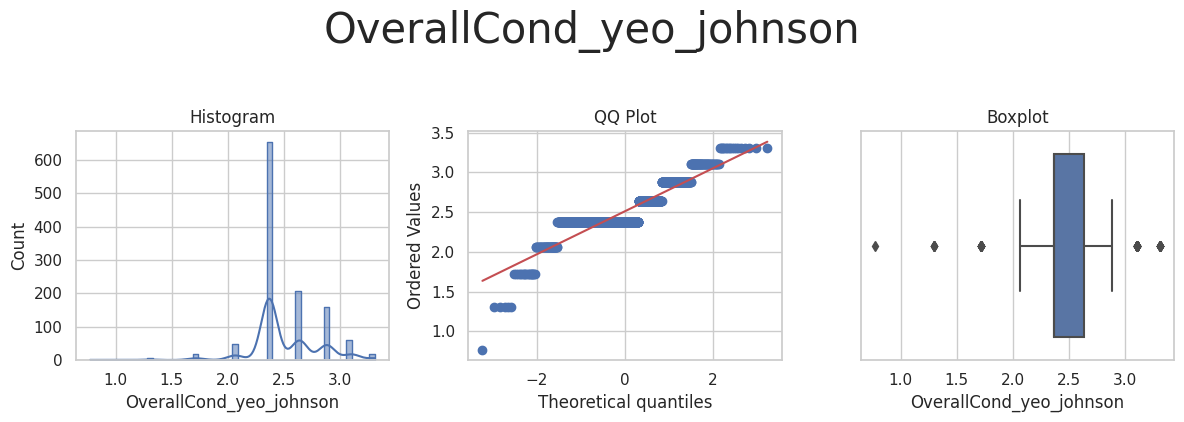



* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_log_e', 'OverallQual_log_10', 'OverallQual_reciprocal', 'OverallQual_power', 'OverallQual_box_cox', 'OverallQual_yeo_johnson'] 



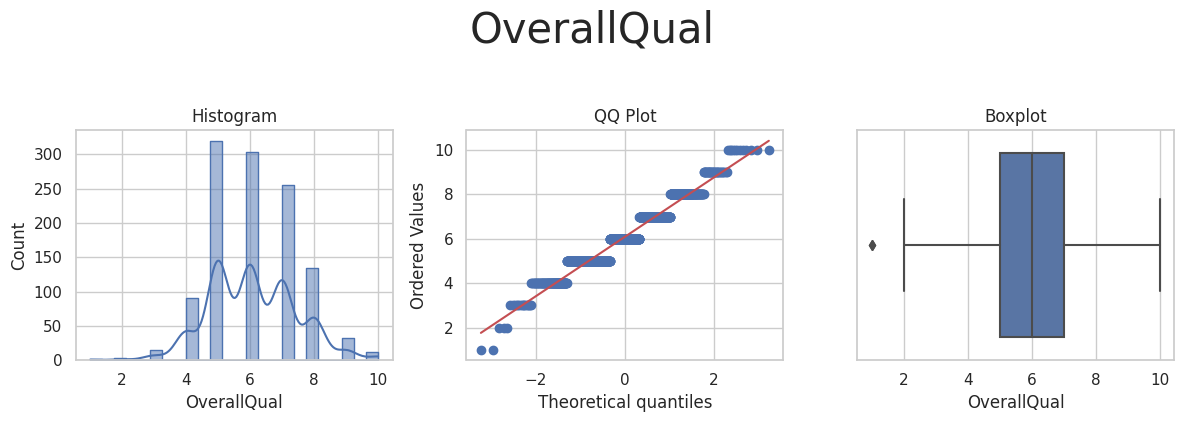

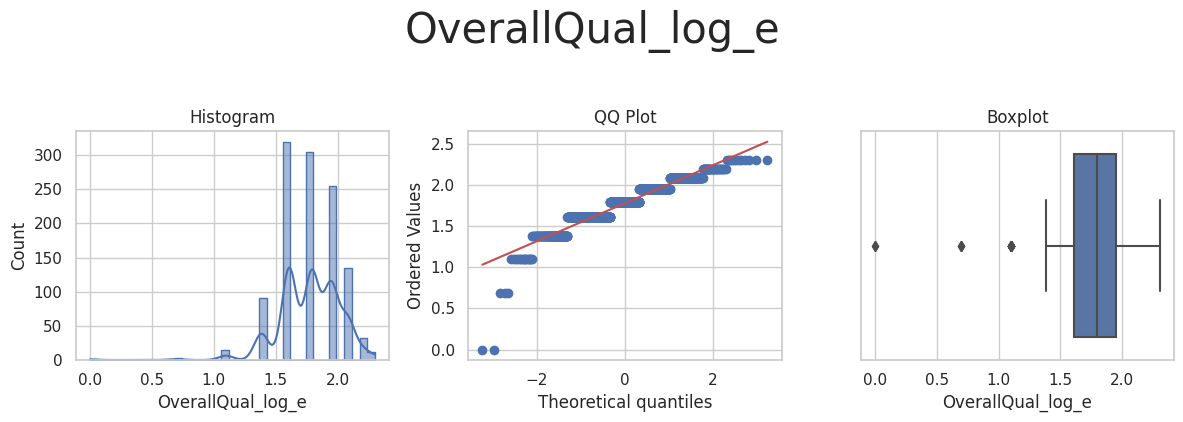

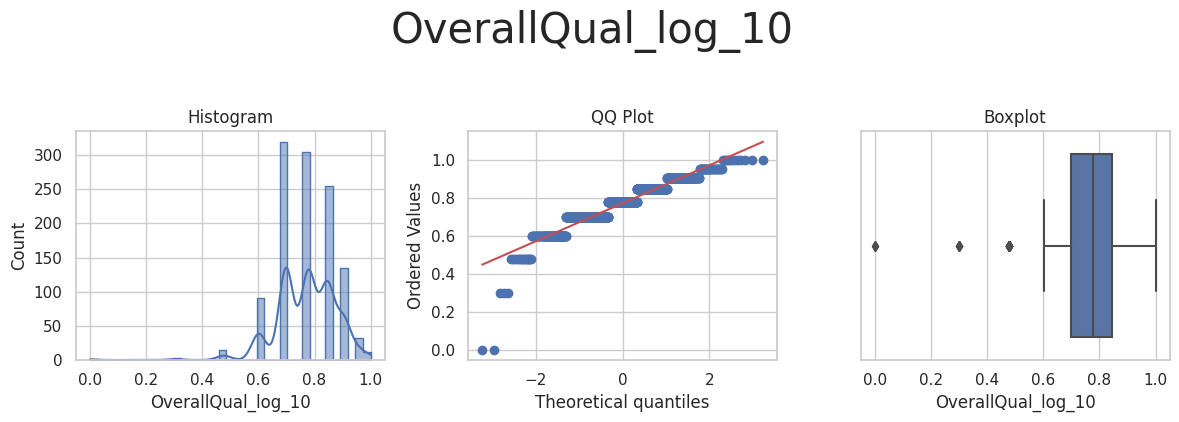

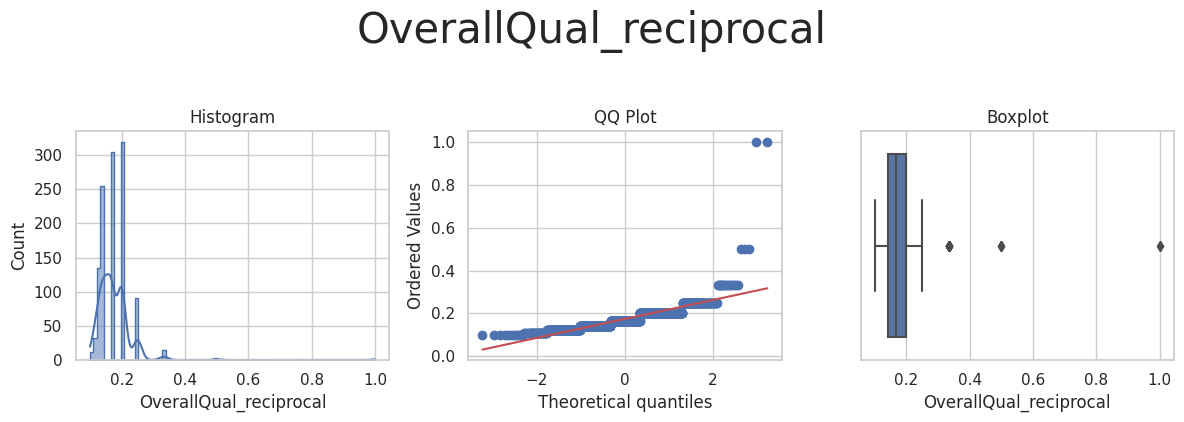

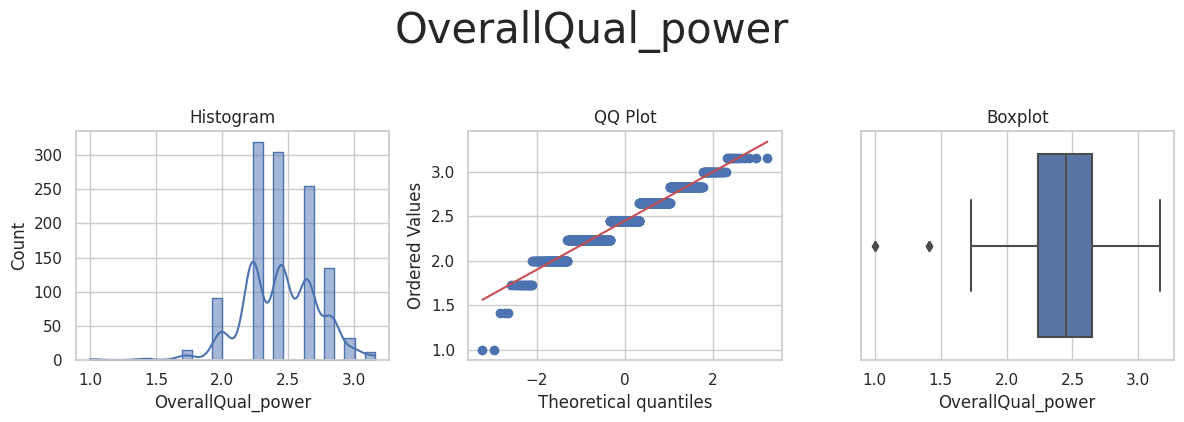

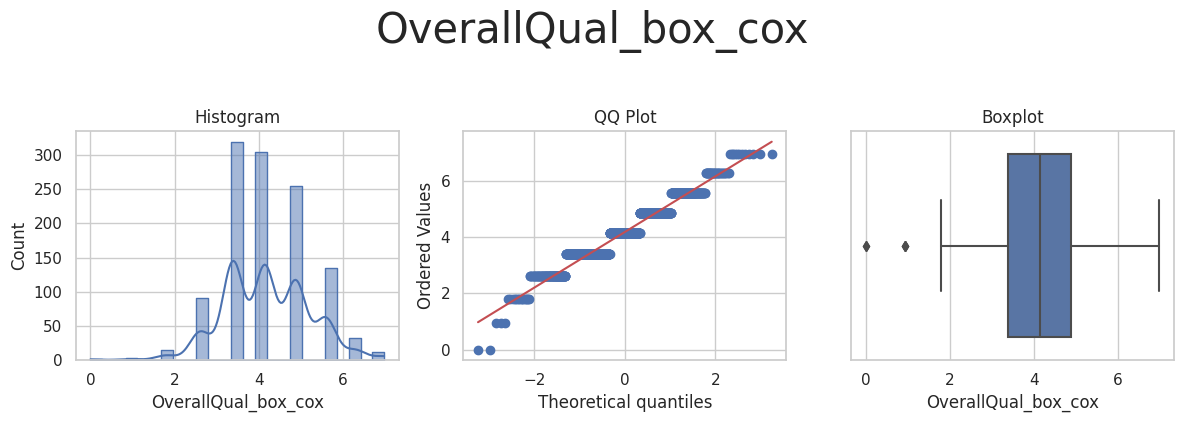

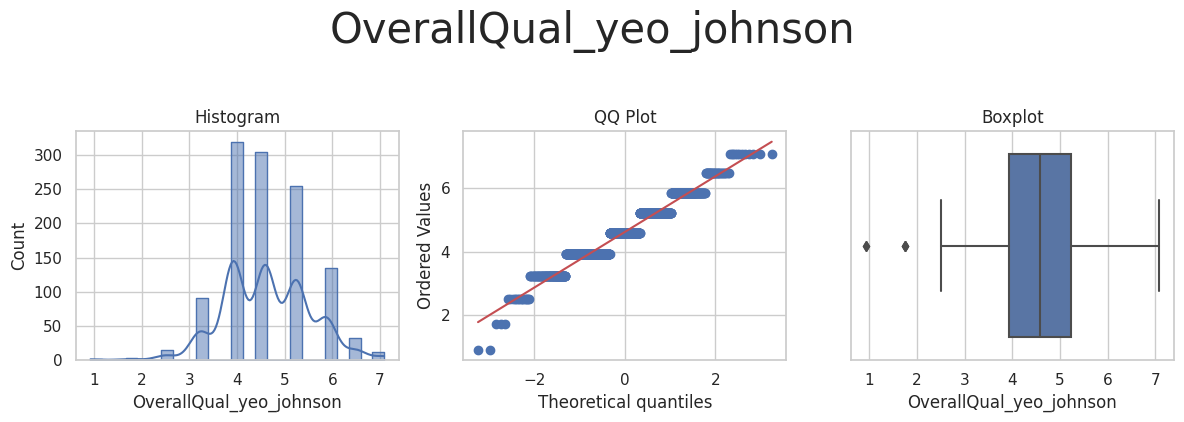

In [14]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

Following the analysis above, each transformer can make those features better in terms of distribution and outliers:

* Log e: 1stFlrSF, GrLivArea, LotArea
* Log 10: 1stFlrSF, GrLivArea, LotArea
* Box Cox: 1stFlrSF, GrLivArea, LotArea, OverallQual, YearBuilt
* Yeo Johnson: All features. 


The function found that Yeo Johnson could be applied on all variables but after closer examination, we can remove the following from the list: BsmtUnfSF, EnclosedPorch, GarageYrBlt, OverallCond and TotalBsmtSF.

We will remove the above variables for the variable_numerical before tranforming the train an test set.

In [12]:
variables_numerical_to_transform = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
                                    'BsmtFinSF1', 'GarageArea', 'YearRemodAdd',
                                    'GrLivArea', 'OverallQual','OpenPorchSF',
                                    'LotArea', 'YearBuilt', 'MasVnrArea',
                                    'LotFrontage']

variables_numerical_to_transform

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'GarageArea',
 'YearRemodAdd',
 'GrLivArea',
 'OverallQual',
 'OpenPorchSF',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'LotFrontage']

In [13]:
TrainSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      1828       0.0           3.0             0          48             0   
1       894       0.0           2.0             1           0             0   
2       964       0.0           2.0             1         713             1   
3      1689       0.0           3.0             1        1218             2   
4      1541       0.0           3.0             1           0             0   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...  LotArea  \
0       1774            0.0         774             0  ...    11694   
1        894            0.0         308             0  ...     6600   
2        163            0.0         432             0  ...    13360   
3        350            0.0         857             1  ...    13265   
4       1541            0.0         843             1  ...    13704   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0         90.0       452.0          108            5            9   
1         60.0         0.0            0            5            5   
2         80.0         0.0            0            7            5   
3         69.0       148.0           59            5            8   
4        118.0       150.0           81            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         1822       2007          2007     314813  
1          894       1962          1962     109500  
2          876       1921          2006     163500  
3         1568       2002          2002     271000  
4         1541       2001          2002     205000  

[5 rows x 23 columns]

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine import transformation as vt

yeojohnson = vt.YeoJohnsonTransformer(variables = variables_numerical_to_transform)

df_transformed = yeojohnson.fit_transform(TrainSet)
df_transformed.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.585316      -0.0      2.840049             0    6.231707             0   
1  6.857203      -0.0      1.917971             1    0.000000             0   
2  6.933857      -0.0      1.917971             1   15.082414             1   
3  7.504725      -0.0      2.840049             1   17.584777             2   
4  7.411301      -0.0      2.840049             1    0.000000             0   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...    LotArea  \
0       1774            0.0  285.045723             0  ...   9.874667   
1        894            0.0  133.391173             0  ...   9.241645   
2        163            0.0  176.329005             0  ...  10.022651   
3        350            0.0  309.970775             1  ...  10.014716   
4       1541            0.0  305.798023             1  ...  10.050922   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0    17.923317    3.049801     4.880037            5     6.484417   
1    14.220455   -0.000000     0.000000            5     3.922905   
2    16.765758   -0.000000     0.000000            7     3.922905   
3    15.409265    2.789425     4.237583            5     5.868985   
4    20.871015    2.793018     4.572940            5     5.238591   

   TotalBsmtSF     YearBuilt   YearRemodAdd  SalePrice  
0         1822  6.844123e+70  2.086377e+129     314813  
1          894  4.170722e+70  8.495955e+128     109500  
2          876  2.629589e+70  2.045585e+129     163500  
3         1568  6.481215e+70  1.890051e+129     271000  
4         1541  6.410872e+70  1.890051e+129     205000  

[5 rows x 23 columns]

We are happy with the result of the transformer, we can now apply it to the TrainSet and TestSet.

In [15]:
yeojohnson = vt.YeoJohnsonTransformer(variables = variables_numerical)

TrainSet = yeojohnson.fit_transform(TrainSet)
TestSet = yeojohnson.transform(TestSet)
TrainSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.585316      -0.0      2.840049             0    6.231707             0   
1  6.857203      -0.0      1.917971             1    0.000000             0   
2  6.933857      -0.0      1.917971             1   15.082414             1   
3  7.504725      -0.0      2.840049             1   17.584777             2   
4  7.411301      -0.0      2.840049             1    0.000000             0   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...    LotArea  \
0  72.117860           -0.0  285.045723             0  ...   9.874667   
1  51.451694           -0.0  133.391173             0  ...   9.241645   
2  21.751877           -0.0  176.329005             0  ...  10.022651   
3  32.178533           -0.0  309.970775             1  ...  10.014716   
4  67.303301           -0.0  305.798023             1  ...  10.050922   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0    17.923317    3.049801     4.880037     2.369163     6.484417   
1    14.220455   -0.000000     0.000000     2.369163     3.922905   
2    16.765758   -0.000000     0.000000     2.882019     3.922905   
3    15.409265    2.789425     4.237583     2.369163     5.868985   
4    20.871015    2.793018     4.572940     2.369163     5.238591   

   TotalBsmtSF     YearBuilt   YearRemodAdd  SalePrice  
0   495.850351  6.844123e+70  2.086377e+129     314813  
1   280.785318  4.170722e+70  8.495955e+128     109500  
2   276.257124  2.629589e+70  2.045585e+129     163500  
3   439.843394  6.481215e+70  1.890051e+129     271000  
4   433.785653  6.410872e+70  1.890051e+129     205000  

[5 rows x 23 columns]

## SmartCorrelatedSelection Variables

In [16]:
df_engineering = TrainSet.copy()
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.585316      -0.0      2.840049             0    6.231707             0   
1  6.857203      -0.0      1.917971             1    0.000000             0   
2  6.933857      -0.0      1.917971             1   15.082414             1   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...    LotArea  \
0  72.117860           -0.0  285.045723             0  ...   9.874667   
1  51.451694           -0.0  133.391173             0  ...   9.241645   
2  21.751877           -0.0  176.329005             0  ...  10.022651   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0    17.923317    3.049801     4.880037     2.369163     6.484417   
1    14.220455   -0.000000     0.000000     2.369163     3.922905   
2    16.765758   -0.000000     0.000000     2.882019     3.922905   

   TotalBsmtSF     YearBuilt   YearRemodAdd  SalePrice  
0   495.850351  6.844123e+70  2.086377e+129     314813  
1   280.785318  4.170722e+70  8.495955e+128     109500  
2   276.257124  2.629589e+70  2.045585e+129     163500  

[3 rows x 23 columns]

In [17]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'SalePrice'},
 {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]

In [18]:
corr_sel.features_to_drop_

['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'YearBuilt']

---

# Conclusions

The list below shows the transformations needed for feature engineering for each feature.


Feature Engineering Transformers:

Ordinal categorical encoding: ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

Yeo Johnson: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'YearRemodAdd', 'GrLivArea', 'OverallQual', 'OpenPorchSF', 'LotArea', 'YearBuilt', 'MasVnrArea', 'LotFrontage']

Smart Correlation Selection: ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'YearBuilt']

Those steps will be added in the ML Pipeline